In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
human_data = pd.read_csv('input_csvs/human_phantasia_data.csv')
llm_data = pd.read_csv('input_csvs/llm_phantasia_data.csv')

In [3]:
human_data

,ResponseId,001 - Response,002 - Response,003 - Response,004 - Response,005 - Response,006 - Response,007 - Response,008 - Response,009 - Response,...,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_5vQ6Xf1WugueDND,NaN,NaN,NaN,NaN,two chairs,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid
1,R_6D6PBkrChss508l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
2,R_53qZezuj1Aowmel,ladder,comb,NaN,bra,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,2. Vague and dim,2. Vague and dim,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,2. Vague and dim
3,R_6hazd14Iv0vRJV7,two squares,NaN,key,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...","1. No image at all, you only 'know' that you a...",4. Clear and reasonably vivid,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision
4,R_5KpdGyLKCFDJS5r,NaN,NaN,NaN,NaN,NaN,House,NaN,Butterfly,Mountain,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,ladder,NaN,NaN,NaN,NaN,NaN,tree,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid
96,R_1paSSMOwVWpJyn2,NaN,NaN,glasses,NaN,NaN,NaN,NaN,bow tie,NaN,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid
97,R_7NhDTJ2fxewY5qh,NaN,Ladder,Circles,NaN,NaN,NaN,NaN,NaN,Butterfly,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,3. Moderately clear and vivid
98,R_5RvyCf53JoQh7Eg,NaN,Ladder,NaN,No idea,The same as previous question,hourglass,Arrow,NaN,Butterfly,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly cle

In [4]:
llm_data

,Model,001,002,003,004,005,006,007,008,009,...,50,51,52,53,54,55,56,57,58,59
0,Gemini 2.5 Pro Multiple Context (2025-07-21),ladder,Ladder,bed,bed,bed,snail,arrow,Winged Scepter,Butterfly,...,Stick figure,Birdhouse,Shelf bracket,sailboat,key,Planted sword,Verified icon,Letter Z.,anchor,arrow
1,OpenAI o3 Multiple Context (2025-07-21),Ladder,Ladder,Barbell,Goal posts,bed,Owl,tree,Butterfly,Butterfly,...,Anchor,Television,Letter F,Sailboat,smoking pipe,Martini glass,Registered trademark,Hourglass,Umbrella,Arrow
2,OpenAI ChatGPT-4o Single Context (2025-07-25),ladder,Ladder,butterfly,butterfly,butterfly,Insect head,hourglass,butterfly,Butterfly,...,tree,crest,flagpole,keyhole,music clef,Location marker,arrow,kite,Umbrella,arrow
3,GPT 4.1 Single Context (2025-07-21),ladder,Ladder,spade,heart,butterfly,glasses,tree,butterfly,Butterfly,...,candelabra,key,flagpole,sailboat,music note,Martini glass,Peace sign,Bow tie,Umbrella,arrowhead
4,Gemini 2.0 Flash Multiple Context (2025-07-21),Stacked H's,Ladder,bed,bed,woman,glasses,hourglass,butterfly,heart,...,Wine glass,keyhole,crosshair,Golf club,Paperclip,arrowhead,Partial logo.,hashtag,Hanging scale,arrowhead
5,OpenAI o4-mini Single Context (2025-07-21),Ladder,Ladder,Wine glass,Tongs,Tongs,Binoculars,tree,Butterfly,clover,...,Anchor,Birdhouse,Step stool,Pitching wedge,Bottle opener,Letter T,Power button,Truss bridge,Umbrella,Bird feeder
6,GPT 4.1 Single Context w/ Images (2025-07-21),ladder,fence,fence,Glasses,bed,glasses,Spire,butterfly,Butterfly,...,slingshot,keyhole,Letter F,Desk lamp,flag,pushpin,arm,Tape dispenser,Umbrella,bridge
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),ladder,Train tracks,butterfly,owl,glasses,Steering wheel,Rocket exhaust,butterfly,Butterfly,...,tree,figure,flagpole,Flag bracket,music clef,anchor,arrow,hourglass,Elephant trunk,campfire
8,OpenAI o3 Pro Multiple Context (2025-07-21),Ladder,Ladder,Spectacles,Goggles,glasses,Binoculars,tree,Butterfly,Butterfly,...,Stick figure,television,Letter F,Sailboat,key,Martini glass,lowercase r,Scissor jack,Umbrella,tree
9,GPT 4.1 Multiple Context (2025-07-21),ladder,Ladder,glasses,Glasses,glasses,glasses,Wine glass,butterfly,owl,...,Wine glass,keyhole,flagpole,Musical note,Gas pump,anchor,arm,Railroad crossing,Musical clef,Gymnastics apparatus


In [5]:
crowdsourced_data = pd.read_csv('input_csvs/human_response_ranking_data.csv')
crowdsourced_data

,StartDate,EndDate,Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Q1,PID,b1_q1_door knob,...,b60_q1371_cube,b60_q1372_diamond,b60_q1373_envelope,b60_q1374_house,b60_q1375_hut,b60_q1376_party hat,b60_q1377_roof,b60_q1378_television,b60_q1379_trapezium,b60_q1380_TV
0,2025-08-08 10:03:47,2025-08-08 10:09:21,True,2025-08-08 10:09:22,R_7yOFgP0c0Kfd8aZ,anonymous,EN,Accept,62e05a40c77214b0772d5596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-08-08 10:05:08,2025-08-08 10:14:37,True,2025-08-08 10:14:37,R_5yrOnDogUCzSTjL,anonymous,EN,Accept,5dda9b9a9d9e30a06d320ffb,NaN,...,NaN,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-08-08 10:14:18,2025-08-08 10:19:55,True,2025-08-08 10:19:56,R_3jZ1B5pAuPBnE0S,anonymous,EN,Accept,65ca9c729a13f898ae374552,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-08-08 10:10:27,2025-08-08 10:23:29,True,2025-08-08 10:23:31,R_7axyHC8c9d19RTG,anonymous,EN,Accept,6734c699d11234d19b0be0ec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-08-08 10:48:59,2025-08-08 10:54:42,True,2025-08-08 10:54:43,R_1zrZGpupYQtYXYJ,anonymous,EN,Accept,669327c8eb71f9a6ca83eaab,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2025-08-08 11:07:30,2025-08-08 11:42:40,True,2025-08-08 11:42:41,R_5EEVwPAGKC7UsSL,anonymous,EN,Accept,6738bbb49b751f21694bb4af,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,2025-08-08 11:42:35,2025-08-08 11:47:59,True,2025-08-08 11:48:00,R_15x8SJt8vE97tVT,anonymous,EN,Accept,6604664cb53a76971c8a1dce,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,2025-08-08 11:38:48,2025-08-08 11:48:33,True,2025-08-08 11:48:35,R_6MyV7x3J9zIxLEd,anonymous,EN,Accept,605220735560745cf0a16a80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,2025-08-08 11:04:22,2025-08-08 11:56:17,True,2025-08-08 11:56:17,R_6PCYPS1TSISKRdD,anonymous,EN,Accept,62fdd0e557fbc97b30b32ae3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse spaces; '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)


def parse_block(header: str) -> int | None:
    """
    Extract leading block number 1..60 from a column header.
    Accepts leading zeros and trailing text.
    """
    m = re.match(r'^\s*0*(\d+)', str(header))
    if not m:
        return None
    b = int(m.group(1))
    return b if 1 <= b <= 60 else None

# 1) Tidy Crowdsourced Data CSV

In [7]:
# Column regex
# Pattern like: b12_q345_label text
_COL_RE = re.compile(r'^(b\d+)_q(\d+)_([\s\S]+)$', re.IGNORECASE)

# Map text responses to numeric scale
TEXT_MAP = {
    "not at all": 1,
    "a little": 2,
    "moderately": 3,
    "a lot": 4,
    "completely": 5,
}

In [8]:
def _to_score(value: str) -> int | None:
    """
    Convert a text response to a numeric score 1..5.
    """
    if value is None:
        return None
    s = str(value).strip()
    if s == "" or s.lower() in {"na", "nan"}:
        return None
    m = re.match(r'^\s*(\d+)', s)
    if m:
        try:
            n = int(m.group(1))
            if 1 <= n <= 5:
                return n
        except ValueError:
            pass
    key = re.sub(r'^\d+\s*[\.\-:]\s*', '', s).lower().strip()
    return TEXT_MAP.get(key, None)

In [9]:
def identify_block_columns(df: pd.DataFrame) -> list:
    """

    :param df:
    :return:
    """

    # Identify block columns in order
    block_cols = []
    for idx, c in enumerate(df.columns):
        m = _COL_RE.match(c)
        if m:
            b, qid, label = m.groups()
            block_cols.append((idx, c, b, qid, label))
    return block_cols

In [10]:
def sort_blocks(block_cols: list) -> dict:
    """
    Sort blocks columns by block id in original position
    :param block_cols:
    :return:
    """
    by_block = {}
    for idx, c, b, qid, label in block_cols:
        by_block.setdefault(b, []).append((idx, c, qid, label))
    for b in by_block:
        by_block[b].sort(key=lambda t: t[0])
    return by_block

In [11]:
def iterate_over_blocks(row, block, resp_id):
    rows = []
    for b, items in block.items():
        repeat = 0
        for _, col, qid, label in items:
            raw = row.get(col, "")  # if the current cell is blank, respondent did not answer so move to next
            score = _to_score(raw)  # convert textual score to numberic
            if score is None:
                continue
            repeat += 1
            mnum = re.match(r'^b(\d+)$', b, re.IGNORECASE)
            block_num = int(mnum.group(1)) if mnum else None
            rows.append({
                "ResponseId": resp_id,
                "block": b,
                "block_num": block_num,
                "repeat_index": repeat,
                "qid": qid,
                "label": label,
                "score": score,
                "raw": raw,
            })
    return rows

In [12]:
def iterate_over_responses(by_block, df):
    """
    Iterate over each response
    :param by_block:
    :param df:
    :return:
    """
    rows = []
    for _, r in df.iterrows():
        resp_id = r.get("ResponseId")
        rows += iterate_over_blocks(r, by_block, resp_id)

    out = pd.DataFrame(rows)
    if not out.empty:
        out["repeat_index"] = pd.to_numeric(out["repeat_index"], errors="coerce")
        out = out.sort_values(by=["ResponseId", "block_num", "repeat_index"],
                              ascending=[True, True, True], na_position="last").reset_index(drop=True)
    return out

In [13]:
def tidy_block_scores(df) -> pd.DataFrame:
    block_cols = identify_block_columns(df)
    by_block = sort_blocks(block_cols)
    return iterate_over_responses(by_block, df)

In [14]:
expert_crowdsourced_data = pd.read_csv("input_csvs/expert_response_ranking_data.csv")

In [15]:
tidy_crowdsourced_data = tidy_block_scores(crowdsourced_data)
tidy_crowdsourced_data

,ResponseId,block,block_num,repeat_index,qid,label,score,raw
0,R_10qMKOFXS2FbriN,b2,2,1,8,H,2,A little
1,R_10qMKOFXS2FbriN,b3,3,1,28,doorway,1,Not at all
2,R_10qMKOFXS2FbriN,b4,4,1,56,music notes,5,Completely
3,R_10qMKOFXS2FbriN,b4,4,2,59,spectacles,1,Not at all
4,R_10qMKOFXS2FbriN,b10,10,1,146,cyrillic letter,5,Completely
...,...,...,...,...,...,...,...,...
8335,R_7yOFgP0c0Kfd8aZ,b47,47,2,1118,musical clef,1,Not at all
8336,R_7yOFgP0c0Kfd8aZ,b53,53,1,1243,Boat,5,Completely
8337,R_7yOFgP0c0Kfd8aZ,b53,53,2,1251,musical note,1,Not at all
8338,R_7yOFgP0c0Kfd8aZ,b56,56,1,1316,verified icon,1,Not at all


In [16]:
tidy_expert_data = tidy_block_scores(expert_crowdsourced_data)
tidy_expert_data

,ResponseId,block,block_num,repeat_index,qid,label,score,raw
0,R_5PAMRt4s9LlEvnx,b1,1,1,1,door knob,1,Not at all
1,R_5PAMRt4s9LlEvnx,b1,1,2,2,ladder,5,Completely
2,R_5PAMRt4s9LlEvnx,b1,1,3,3,stacked H's,1,Not at all
3,R_5PAMRt4s9LlEvnx,b1,1,4,4,tower,3,Moderately
4,R_5PAMRt4s9LlEvnx,b1,1,5,5,train track,5,Completely
...,...,...,...,...,...,...,...,...
1375,R_5PAMRt4s9LlEvnx,b60,60,8,1376,party hat,1,Not at all
1376,R_5PAMRt4s9LlEvnx,b60,60,9,1377,roof,3,Moderately
1377,R_5PAMRt4s9LlEvnx,b60,60,10,1378,television,1,Not at all
1378,R_5PAMRt4s9LlEvnx,b60,60,11,1379,trapezium,1,Not at all


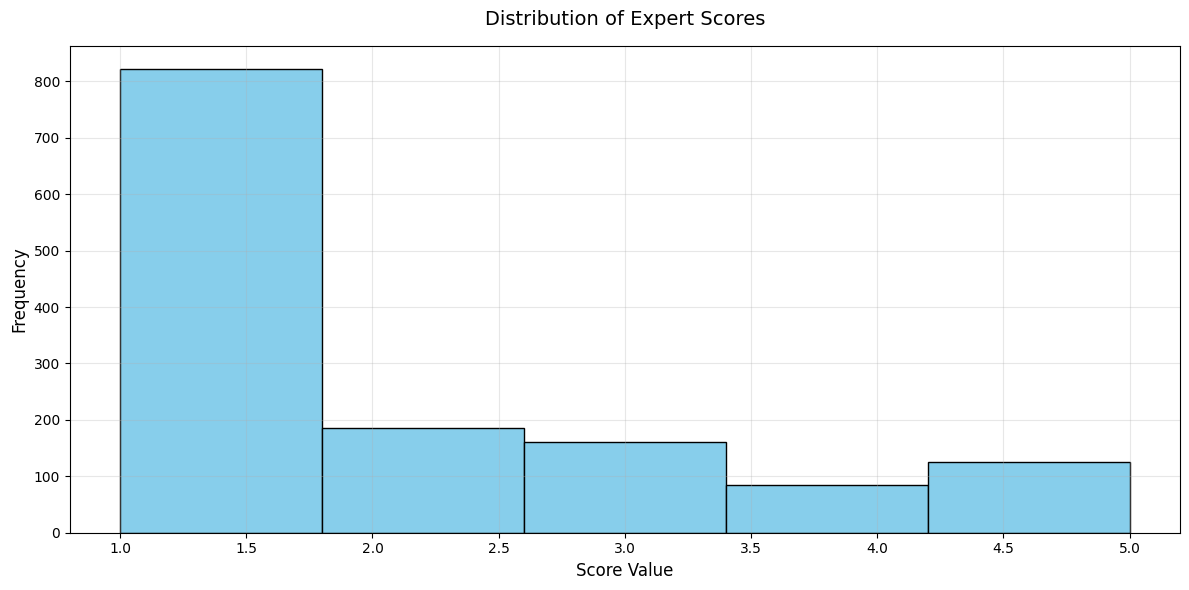

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(tidy_expert_data['score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Expert Scores', pad=15, fontsize=14)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
tidy_crowdsourced_data.to_csv("output_csvs/tidy_crowdsourced_data.csv")
tidy_expert_data.to_csv("output_csvs/tidy_expert_data.csv")

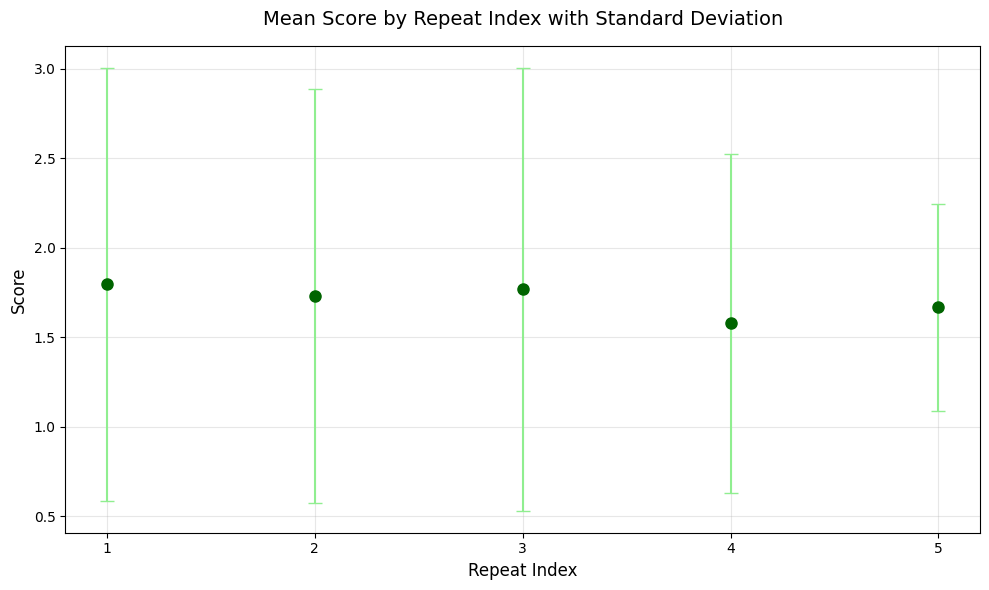

In [19]:
repeat_scores = tidy_crowdsourced_data.groupby('repeat_index')['score'].agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
plt.errorbar(repeat_scores.index, repeat_scores['mean'],
             yerr=repeat_scores['std'], fmt='o', capsize=5,
             color='darkgreen', ecolor='lightgreen', markersize=8)
plt.title('Mean Score by Repeat Index with Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Repeat Index', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

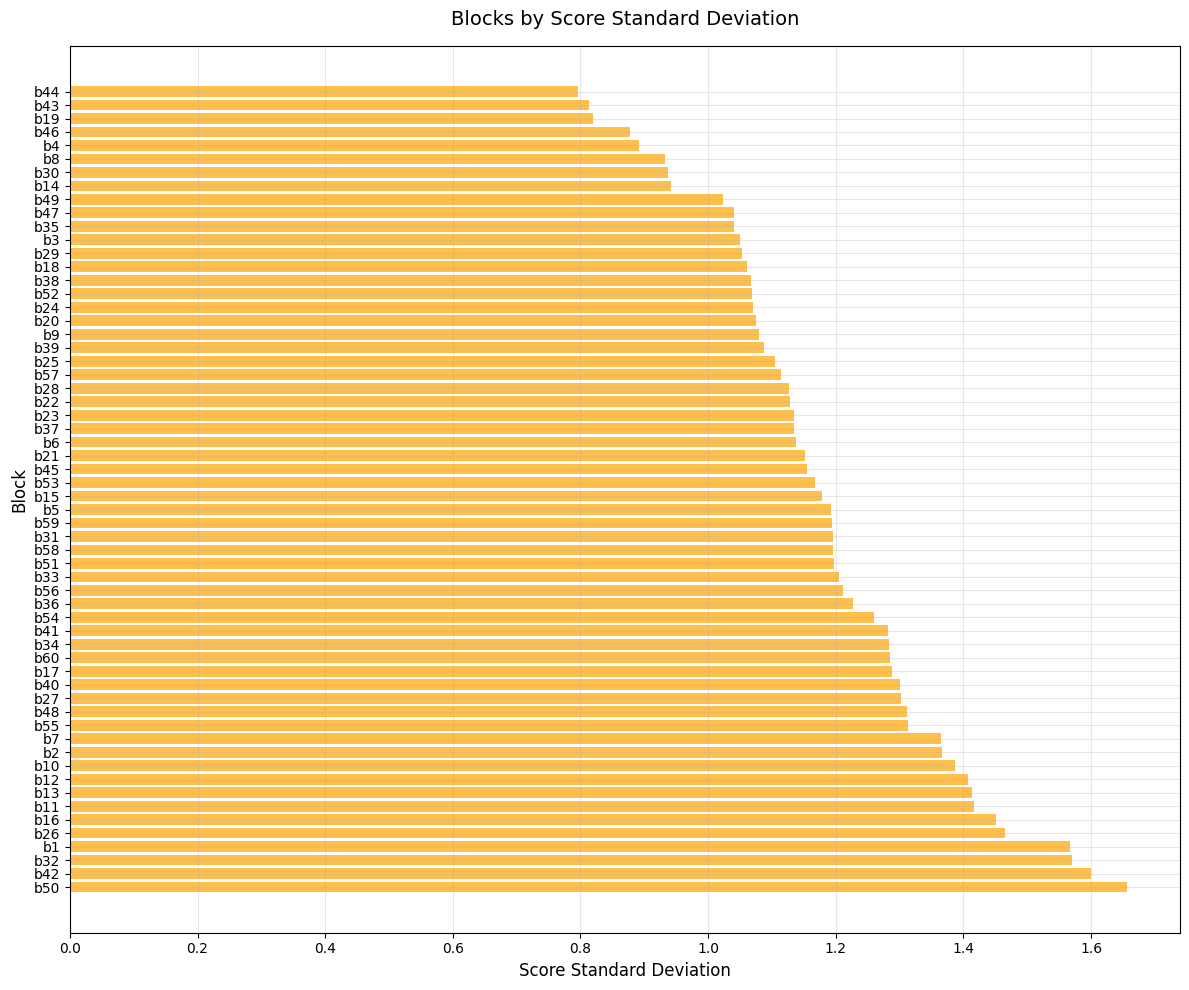

In [20]:
score_std = tidy_crowdsourced_data.groupby('block')['score'].std()
sorted_std = score_std.sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_std)), sorted_std.values, color='orange', alpha=0.7)
plt.title('Blocks by Score Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Score Standard Deviation', fontsize=12)
plt.ylabel('Block', fontsize=12)
plt.yticks(range(len(sorted_std)), sorted_std.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

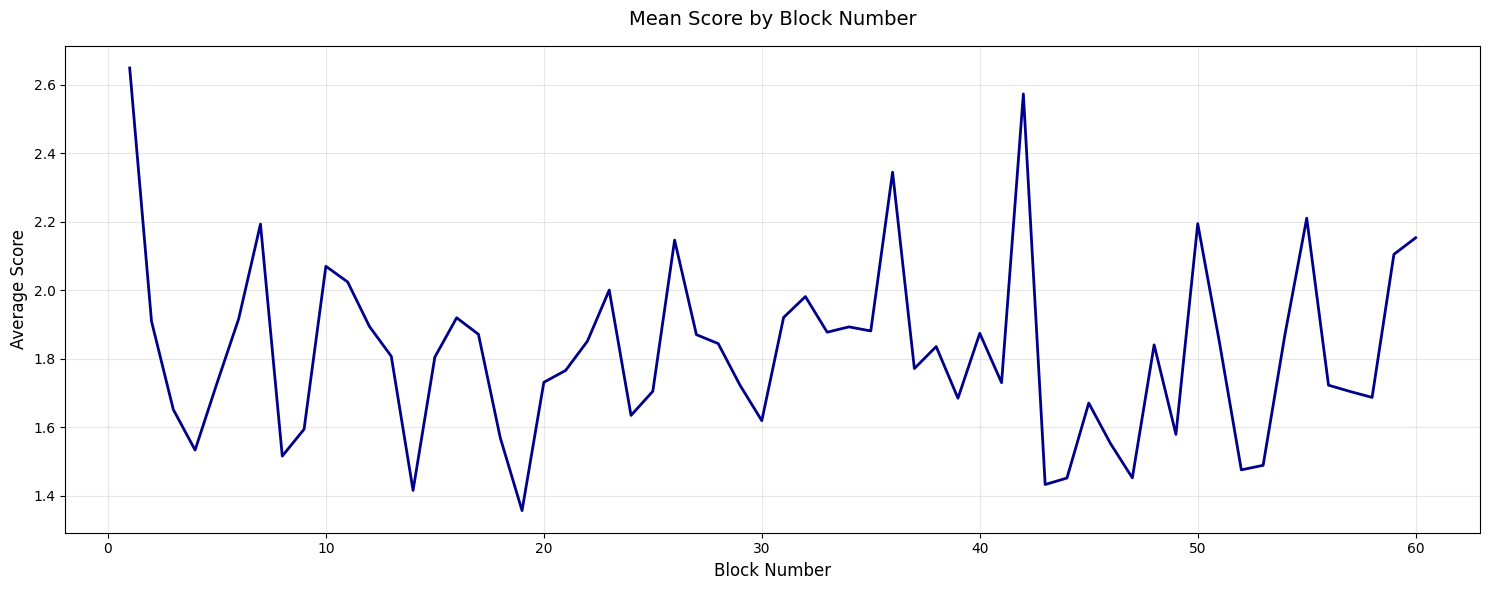

In [21]:
import matplotlib.pyplot as plt

score_by_block = tidy_crowdsourced_data.groupby('block_num')['score'].mean()

plt.figure(figsize=(15, 6))
plt.plot(score_by_block.index, score_by_block.values, color='darkblue', linewidth=2)
plt.title('Mean Score by Block Number', fontsize=14, pad=15)
plt.xlabel('Block Number', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

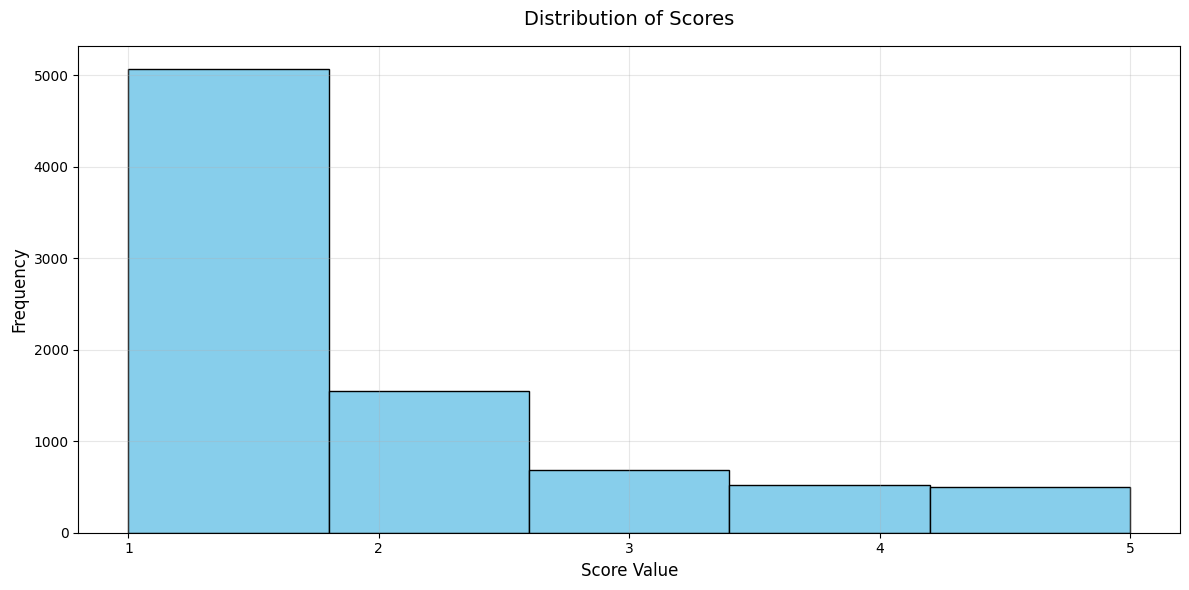

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(tidy_crowdsourced_data['score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores', fontsize=14, pad=15)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# 2 ) Overall Mean Per Label and Per Block+QID

In [23]:
def values_wide_with_stats(df_tidy: pd.DataFrame, df_expert=None) -> pd.DataFrame:
    """
    group_by: 'label'
    """
    df = df_tidy.copy()
    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score", "label"])
    df["label"] = df["label"].astype(str).str.strip()
    df["block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    df["qid"] = pd.to_numeric(df["qid"], errors="coerce")
    group_cols = ["block_num", "qid", "label"]
    index_cols = group_cols
    df["_seq"] = df.groupby(group_cols).cumcount() + 1
    wide = df.pivot_table(index=index_cols, columns="_seq", values="score", aggfunc="first")
    wide.columns = [f"value_{int(c)}" for c in wide.columns]
    wide = wide.reset_index()
    val_cols = [c for c in wide.columns if c.startswith("value_")]
    wide["normal_mean_score"] = wide[val_cols].mean(axis=1, skipna=True)
    wide["normal_sd_score"] = wide[val_cols].std(axis=1, ddof=0, skipna=True)

    if df_expert is not None:
        exp_df = values_wide_with_stats(df_expert)
        cols = [c for c in exp_df.columns if c.startswith("value_")]
        expert_cols = [c.replace("value", "expert_value") for c in cols]
        for c, e in zip(cols, expert_cols):
            exp_df.rename({c: e}, axis=1, inplace=True)
        exp_df.rename({"normal_mean_score": "expert_mean_score", "normal_sd_score": "expert_sd_score"}, axis=1,
                      inplace=True)
        wide = pd.merge(wide, exp_df, on=["label", "block_num", "qid"])
        wide["average_mean_score"] = (wide["expert_mean_score"] + wide["normal_mean_score"]) / 2
    return wide

In [24]:
CANON_WORDS = [
    "Ladder",
    "Ladder",
    "Glasses",
    "Glasses",
    "Glasses",
    "Glasses",
    "Pine Tree",
    "Butterfly",
    "Butterfly",
    "Comb - Pitchfork",
    "Comb - Pitchfork",
    "Goblet",
    "Goblet",
    "Computer Mouse",
    "House",
    "Ice cream",
    "Ice cream",
    "Ice cream",
    "Computer Mouse",
    "Crystal ball - Person Outline",
    "Crystal ball - Person Outline",
    "Fish",
    "Lollipop",
    "Chair",
    "Chair",
    "Flag",
    "Door",
    "Glasses",
    "Shovel",
    "Fish bones",
    "Balloon",
    "Goblet",
    "Plunger",
    "Bow tie - Owl",
    "Bow tie - Owl",
    "Broom",
    "Clubs symbol",
    "Clubs symbol - Ice cream",
    "Clubs symbol - Ice cream",
    "Mug",
    "Mug",
    "Window - Grid",
    "Mouse",
    "Computer Mouse",
    "Clock",
    "Lightbulb - Ice Cream",
    "Computer Mouse",
    "Letter T",
    "Heart",
    "Stick Figure",
    "Television",
    "Letter F",
    "Sailboat",
    "Music Note",
    "Yield Sign - Martini Glass",
    "Clock",
    "Hourglass",
    "Umbrella",
    "Pine tree",
    "House",
]

In [25]:
def add_canon_between_qid_label(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    if "block_num" not in df2.columns:
        raise ValueError("add_canon_between_qid_label: requires a 'block_num' column.")
    df2["block_num"] = pd.to_numeric(df2["block_num"], errors="coerce")
    mapping = {i + 1: w for i, w in enumerate(CANON_WORDS)}
    df2["canon"] = df2["block_num"].map(mapping)
    if "qid" in df2.columns and "label" in df2.columns:
        cols = []
        for c in df2.columns:
            cols.append(c)
            if c == "qid":
                cols.append("canon")
        seen, ordered = set(), []
        for c in cols:
            if c not in seen:
                seen.add(c)
                ordered.append(c)
        df2 = df2[ordered]
    return df2

In [26]:
means_per_block_qid = values_wide_with_stats(tidy_crowdsourced_data, tidy_expert_data)
means_with_canon = add_canon_between_qid_label(means_per_block_qid)
means_with_canon

,block_num,qid,canon,label,value_1,value_2,value_3,value_4,value_5,value_6,value_7,normal_mean_score,normal_sd_score,expert_value_1,expert_mean_score,expert_sd_score,average_mean_score
0,1,1,Ladder,door knob,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.000000,0.000000,1,1.0,0.0,1.000000
1,1,2,Ladder,ladder,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.000000,0.000000,5,5.0,0.0,5.000000
2,1,3,Ladder,stacked H's,4.0,2.0,3.0,3.0,1.0,3.0,NaN,2.666667,0.942809,1,1.0,0.0,1.833333
3,1,4,Ladder,tower,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.571429,1.049781,3,3.0,0.0,2.285714
4,1,5,Ladder,train track,4.0,3.0,2.0,5.0,4.0,4.0,NaN,3.666667,0.942809,5,5.0,0.0,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,60,1376,House,party hat,2.0,3.0,2.0,2.0,1.0,2.0,NaN,2.000000,0.577350,1,1.0,0.0,1.500000
1372,60,1377,House,roof,2.0,3.0,1.0,2.0,4.0,3.0,NaN,2.500000,0.957427,3,3.0,0.0,2.750000
1373,60,1378,House,television,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.166667,0.372678,1,1.0,0.0,1.083333
1374,60,1379,House,trapezium,1.0,3.0,2.0,2.0,1.0,2.0,NaN,1.833333,0.687184,1,1.0,0.0,1.416667


In [27]:
means_with_canon.to_csv("output_csvs/means_with_canon.csv")

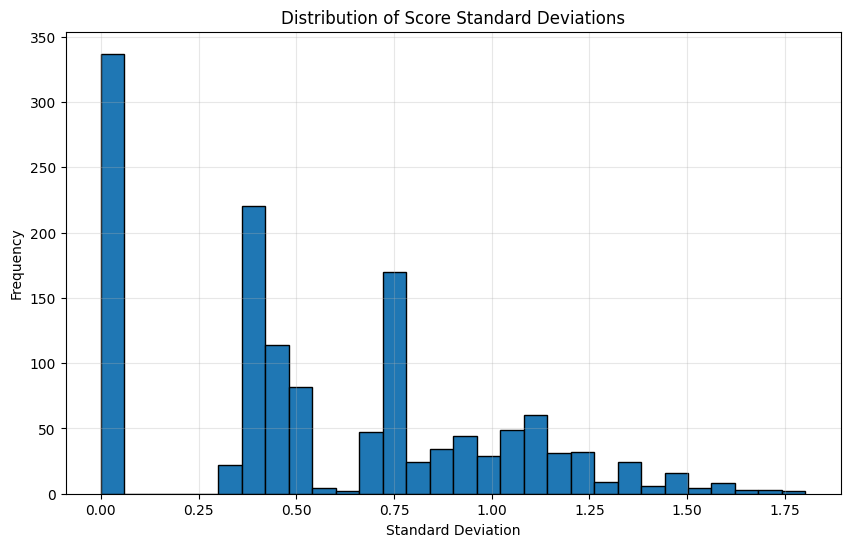

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['normal_sd_score'], bins=30, edgecolor='black')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Score Standard Deviations')
plt.grid(True, alpha=0.3)

plt.show()

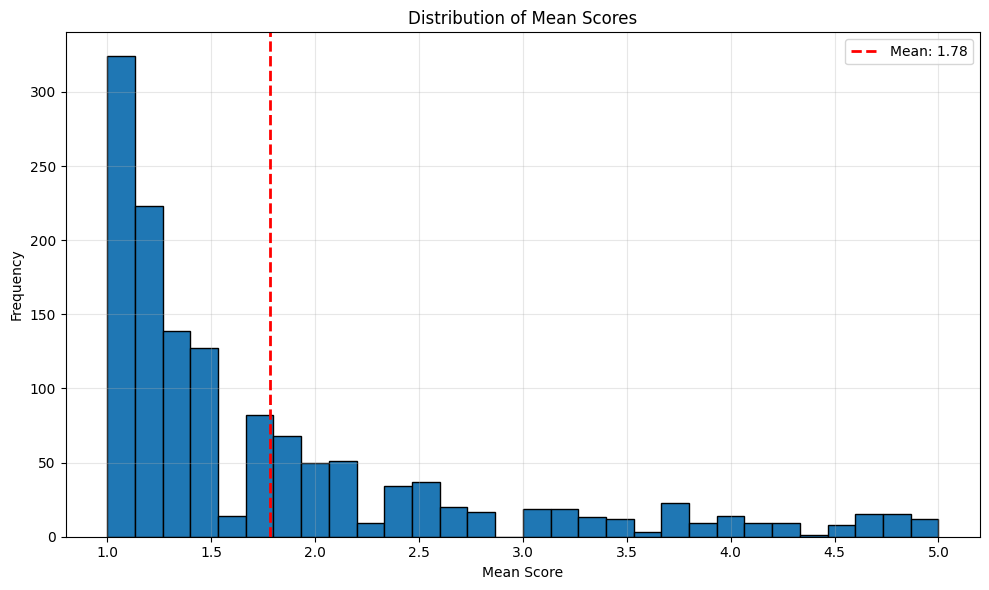

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['normal_mean_score'], bins=30, edgecolor='black')
plt.axvline(means_with_canon['normal_mean_score'].mean(), color='red', linestyle='dashed',
            linewidth=2, label=f'Mean: {means_with_canon["normal_mean_score"].mean():.2f}')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3 ) VVIQ Scores

In [30]:
def extract_leading_number(series: pd.Series) -> pd.Series:
    """
    From strings like '1 Very vivid' or '  4 - Barely vivid',
    extract the leading integer. Returns float with NaN on failure.
    """
    s = series.astype(str)
    # grab the first integer at the start of the string
    nums = s.str.extract(r'^\s*(\d+)')[0]
    return pd.to_numeric(nums, errors="coerce")

In [31]:
def get_vviq_scores(df: pd.DataFrame) -> pd.DataFrame:
    vviq_column_regex = r'^VVIQ\s*[-–]\s*\d{2}$'
    vviq_columns = [c for c in df.columns if re.match(vviq_column_regex, c)]
    if not vviq_columns:
        raise ValueError("get_VVIQ_scores: no vviq columns")
    vviq_numeric = pd.DataFrame(
        {c: extract_leading_number(df[c]) for c in vviq_columns}
    )
    base = df[['ResponseId']].copy()
    scored = pd.concat([base, vviq_numeric], axis=1)
    scored.insert(loc=1, column='VVIQ_sum', value=vviq_numeric.sum(axis=1, min_count=1))
    scored.insert(loc=2, column='VVIQ_mean', value=vviq_numeric.mean(axis=1))
    scored.insert(loc=3, column='VVIQ_std', value=vviq_numeric.std(axis=1, ddof=1))
    return scored

In [32]:
pre_vviq = human_data.reset_index(drop=True)
vviq_scores = get_vviq_scores(pre_vviq)
vviq_scores

,ResponseId,VVIQ_sum,VVIQ_mean,VVIQ_std,VVIQ - 01,VVIQ - 02,VVIQ - 03,VVIQ - 04,VVIQ - 05,VVIQ - 06,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_5vQ6Xf1WugueDND,70,4.3750,0.718795,3,4,3,4,4,5,5,5,5,5,4,4,5,5,5,4
1,R_6D6PBkrChss508l,71,4.4375,0.629153,5,4,5,5,4,5,5,4,4,4,3,5,5,5,4,4
2,R_53qZezuj1Aowmel,49,3.0625,0.928709,4,3,2,4,3,4,5,2,2,2,3,3,3,4,3,2
3,R_6hazd14Iv0vRJV7,56,3.5000,1.825742,1,1,4,3,5,5,5,5,1,1,4,1,5,5,5,5
4,R_5KpdGyLKCFDJS5r,61,3.8125,1.515201,4,2,1,3,5,5,5,5,5,5,2,5,1,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,63,3.9375,0.771902,4,4,3,4,4,4,5,5,5,5,4,3,3,3,3,4
96,R_1paSSMOwVWpJyn2,53,3.3125,0.793200,3,3,2,2,4,4,4,4,3,3,2,3,4,4,4,4
97,R_7NhDTJ2fxewY5qh,53,3.3125,1.014479,2,3,1,4,3,4,4,4,2,3,4,4,3,4,5,3
98,R_5RvyCf53JoQh7Eg,71,4.4375,0.629153,4,4,3,4,5,5,5,5,4,4,5,4,5,5,5,4


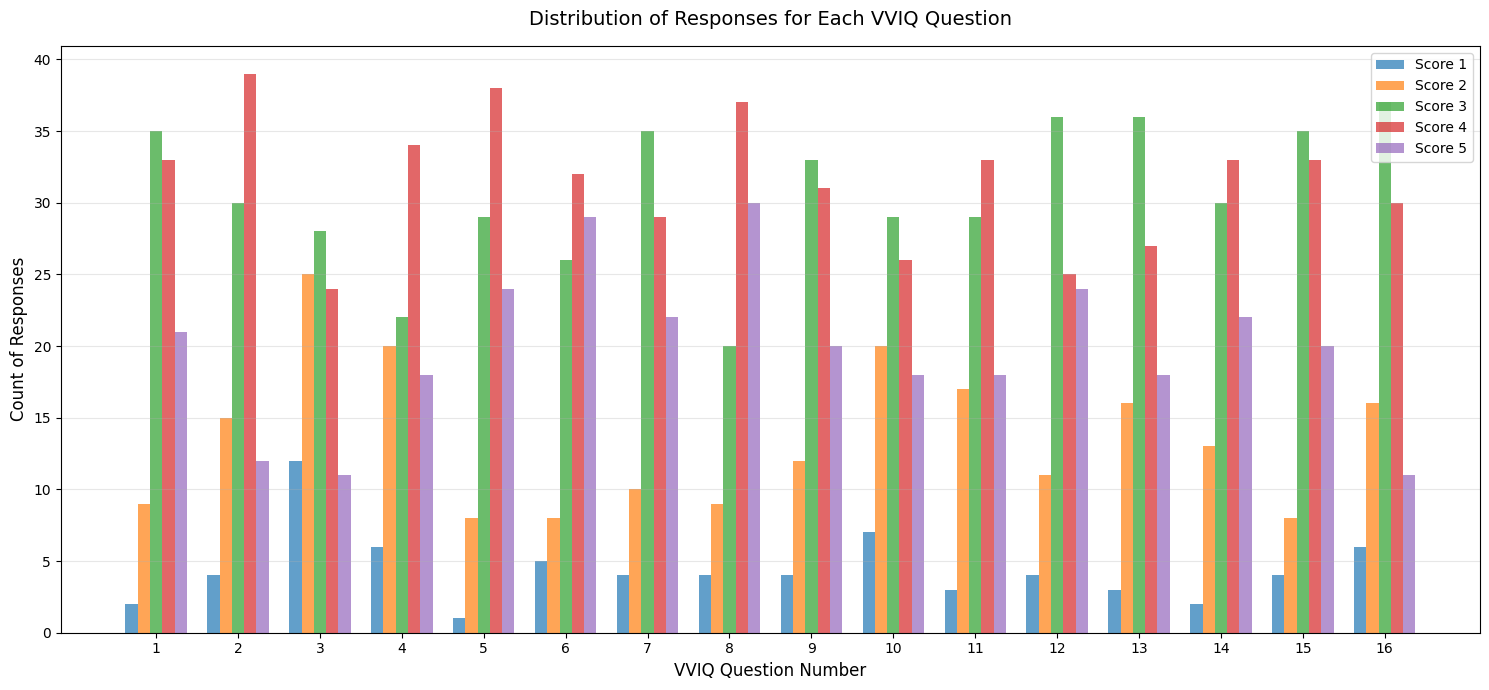

In [33]:
response_counts = {i: [len(vviq_scores[vviq_scores[f'VVIQ - {str(j).zfill(2)}'] == i])
                       for j in range(1, 17)] for i in range(1, 6)}

vviq_vals = np.arange(1, 17)
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 7))

for response, counts in response_counts.items():
    offset = width * multiplier
    ax.bar(vviq_vals + offset, counts, width, label=f'Score {response}', alpha=0.7)
    multiplier += 1

ax.set_xlabel('VVIQ Question Number', fontsize=12)
ax.set_ylabel('Count of Responses', fontsize=12)
ax.set_title('Distribution of Responses for Each VVIQ Question', fontsize=14, pad=15)
ax.set_xticks(vviq_vals + width * 2)
ax.set_xticklabels(range(1, 17))
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

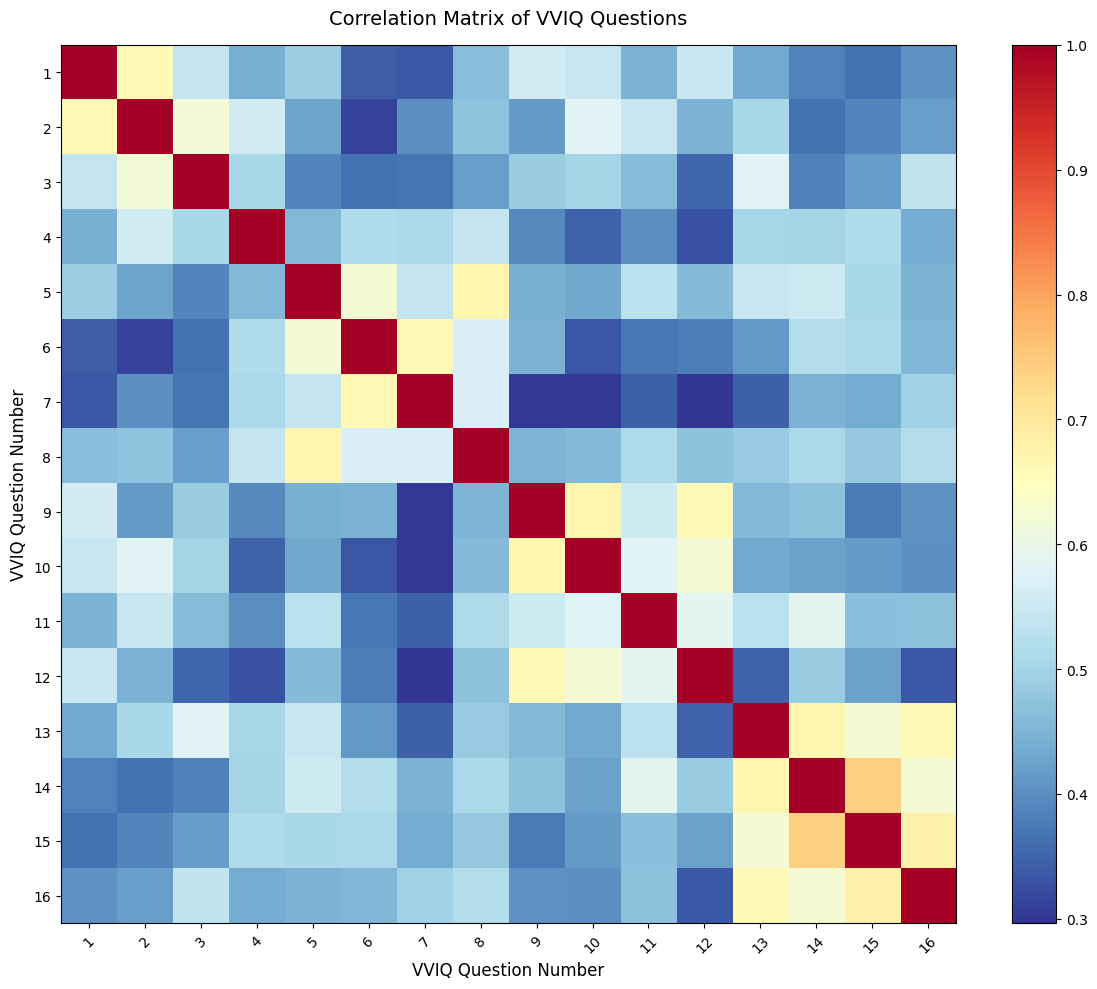

In [34]:
correlations = vviq_scores[[f'VVIQ - {str(i).zfill(2)}' for i in range(1, 17)]].corr()

plt.figure(figsize=(12, 10))
im = plt.imshow(correlations, cmap='RdYlBu_r', aspect='auto')
plt.colorbar(im)
plt.xticks(range(16), range(1, 17), rotation=45)
plt.yticks(range(16), range(1, 17))
plt.xlabel('VVIQ Question Number', fontsize=12)
plt.ylabel('VVIQ Question Number', fontsize=12)
plt.title('Correlation Matrix of VVIQ Questions', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

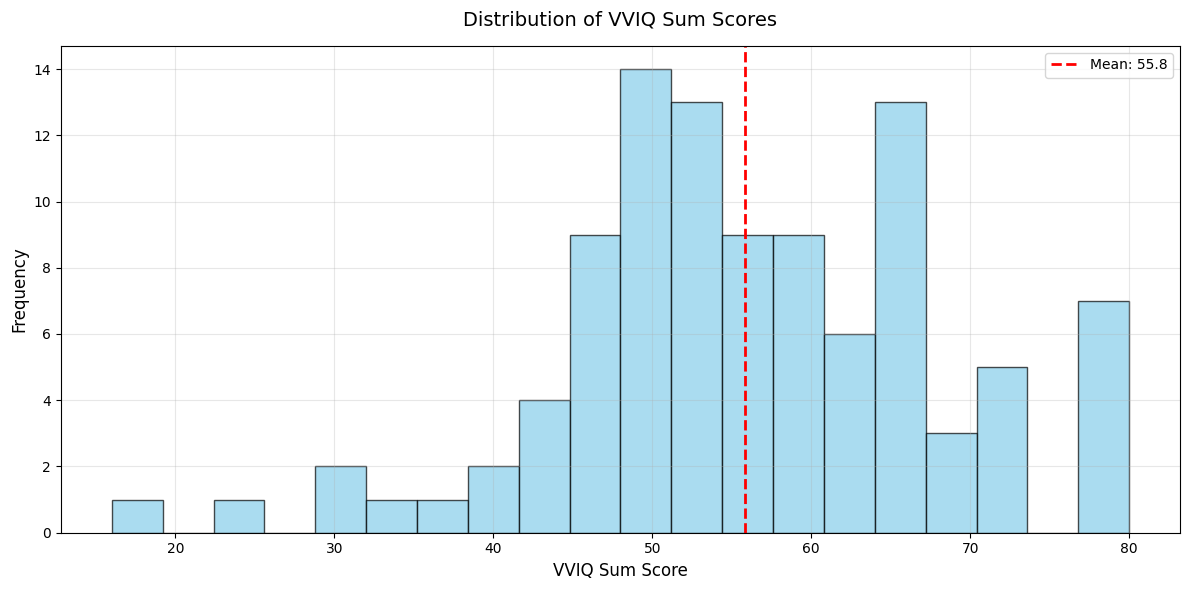

In [35]:
plt.figure(figsize=(12, 6))
plt.hist(vviq_scores['VVIQ_sum'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(vviq_scores['VVIQ_sum'].mean(), color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {vviq_scores["VVIQ_sum"].mean():.1f}')
plt.xlabel('VVIQ Sum Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of VVIQ Sum Scores', fontsize=14, pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
vviq_scores.to_csv("output_csvs/vviq_scores.csv")

# 4) Grading

In [37]:
FINKE_BLOCKS = list(range(48, 59 + 1))
NOVEL_BLOCKS = [x for x in range(1, 60 + 1) if x not in FINKE_BLOCKS]
ALL_BLOCKS = list(range(1, 60 + 1))
FINKE_BLOCKS, NOVEL_BLOCKS, ALL_BLOCKS

([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  60],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60])

In [38]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse internal whitespace. Returns '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)


def parse_block(col_name: str, block_list: list):
    """
    Extract leading block number from a header.
      '01' -> 1
      '01 - Block' -> 1
      '5_block' -> 5
      '060 final' -> 60
    Returns int in 1..60 or None.
    """
    m = re.match(r'^\s*0*(\d+)', str(col_name))
    if not m:
        return None
    bnum = int(m.group(1))
    return bnum if bnum in block_list else None


In [39]:
def sort_blocks(df, block_list):
    block_cols = []
    for i, col in enumerate(df.columns):
        if col == 'ResponseId' or col == 'Model':
            continue
        bnum = parse_block(col, block_list)
        if bnum is not None:
            block_cols.append((col, bnum, i))
    block_cols.sort(key=lambda t: t[2])  # preserve file order
    return block_cols

In [40]:
def build_lookup(df):
    new_df = pd.DataFrame()
    new_df["_block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    new_df["_label_norm"] = df["label"].map(norm_text)
    new_df["_normal_mean_score"] = pd.to_numeric(df["normal_mean_score"], errors="coerce")
    new_df["_expert_mean_score"] = pd.to_numeric(df["expert_mean_score"], errors="coerce")
    new_df["_average_mean_score"] = pd.to_numeric(df["average_mean_score"], errors="coerce")
    new_df["_mc1"] = pd.to_numeric(df["value_1"], errors="coerce")
    new_df["_mc2"] = pd.to_numeric(df["value_2"], errors="coerce")
    new_df["_mc3"] = pd.to_numeric(df["value_3"], errors="coerce")
    new_df["_mc4"] = pd.to_numeric(df["value_4"], errors="coerce")
    new_df["_mc5"] = pd.to_numeric(df["value_5"], errors="coerce")
    new_df["_mc6"] = pd.to_numeric(df["value_6"], errors="coerce")
    new_df["_mc7"] = pd.to_numeric(df["value_7"], errors="coerce")
    new_df["_ec1"] = pd.to_numeric(df["expert_value_1"], errors="coerce")
    #new_df["_ec2"] = pd.to_numeric(df["expert_value_2"], errors="coerce")
    return {(int(b), l): [float(m), float(e), float(a), float(mc1), float(mc2), float(mc3), float(mc4), float(mc5),
                          float(mc6), float(mc7), float(ec1)]
            for b, l, m, e, a, mc1, mc2, mc3, mc4, mc5, mc6, mc7, ec1 in new_df.itertuples(index=False, name=None)}

In [41]:
def grade(responses_df, means_df, key_col, block_list=ALL_BLOCKS) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    usable_means = build_lookup(means_df)
    block_cols = sort_blocks(responses_df, block_list)
    result_list = []
    full_results = []
    ungraded_results = []
    for _, row in responses_df.iterrows():
        key_val = row[key_col]
        normal_total = 0.0
        expert_total = 0.0
        average_total = 0.0
        n_total = 0
        n_graded = 0
        n_ungraded = 0
        for col, bnum, _ in block_cols:
            label_original = str(row.get(col, "")).strip()
            if label_original == "nan":
                continue
            n_total += 1
            label_norm = norm_text(label_original)
            mean_with_components = usable_means.get((bnum, label_norm))
            if mean_with_components is None:
                normal_total += 1
                expert_total += 1
                average_total += 1
                n_ungraded += 1
                ungraded_results.append(
                    {
                        key_col: key_val,
                        "label": label_norm,
                        "raw": label_original,
                    }
                )
            else:
                n_graded += 1
                normal_total += mean_with_components[0]
                expert_total += mean_with_components[1]
                average_total += mean_with_components[2]

                full_results.append(
                    {key_col: key_val,
                     "label": label_norm,
                     "raw": label_original,
                     "normal_mean": mean_with_components[0],
                     "expert_mean": mean_with_components[1],
                     "average_mean": mean_with_components[2],
                     "ranking_1": mean_with_components[3],
                     "ranking_2": mean_with_components[4],
                     "ranking_3": mean_with_components[5],
                     "ranking_4": mean_with_components[6],
                     "ranking_5": mean_with_components[7],
                     "ranking_6": mean_with_components[8],
                     "ranking_7": mean_with_components[9],
                     "expert_1": mean_with_components[10],
                     #"expert_2": mean_with_components[11],
                     })
        if n_total != 0:
            result_list.append({key_col: key_val, "overall_score": average_total, "normal_score": normal_total,
                                "expert_score": expert_total, "n_graded": n_graded, "n_ungraded": n_ungraded,
                                "n_total": n_total, "mean_score_per_item": average_total / n_total})
    return pd.DataFrame(result_list), pd.DataFrame(full_results), pd.DataFrame(ungraded_results)

In [42]:
h_graded_results, h_full_results, h_ungraded_results = grade(human_data, means_with_canon, "ResponseId")
h_graded_results_finke, _, _ = grade(human_data, means_with_canon, "ResponseId", FINKE_BLOCKS)
h_graded_results_novel, _, _ = grade(human_data, means_with_canon, "ResponseId", NOVEL_BLOCKS)

In [43]:
h_graded_results_finke

,ResponseId,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_5vQ6Xf1WugueDND,10.583333,10.166667,11.0,3,1,4,2.645833
1,R_6D6PBkrChss508l,8.750000,9.500000,8.0,3,0,3,2.916667
2,R_53qZezuj1Aowmel,2.166667,2.333333,2.0,2,0,2,1.083333
3,R_6hazd14Iv0vRJV7,4.250000,4.500000,4.0,3,0,3,1.416667
4,R_5KpdGyLKCFDJS5r,6.916667,6.833333,7.0,3,0,3,2.305556
...,...,...,...,...,...,...,...,...
93,R_6HAHLrUWhq9nby4,11.066667,11.133333,11.0,3,0,3,3.688889
94,R_7Kuxq2JKf3BOKPH,6.000000,6.000000,6.0,1,1,2,3.000000
95,R_6RqfSAN0DF8nnsa,2.333333,1.666667,3.0,1,0,1,2.333333
96,R_1paSSMOwVWpJyn2,5.333333,4.666667,6.0,2,0,2,2.666667


Human Finke task set mean score per item: 3.127080405932865


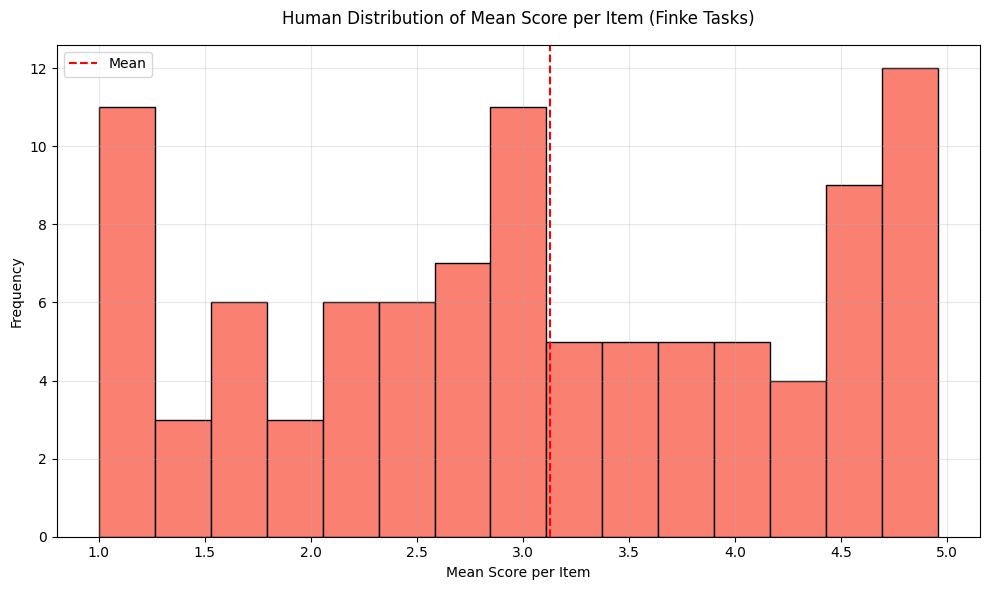

In [44]:
h_finke_mean = h_graded_results_finke["overall_score"].sum() / h_graded_results_finke["n_total"].sum()
print("Human Finke task set mean score per item:", h_finke_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(h_graded_results_finke['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(h_finke_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Human Distribution of Mean Score per Item (Finke Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
h_graded_results_novel

,ResponseId,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_5vQ6Xf1WugueDND,19.547619,19.095238,20.0,11,0,11,1.777056
1,R_6D6PBkrChss508l,21.333333,20.666667,22.0,10,2,12,1.777778
2,R_53qZezuj1Aowmel,25.904762,22.809524,29.0,13,0,13,1.992674
3,R_6hazd14Iv0vRJV7,20.940476,23.880952,18.0,12,0,12,1.745040
4,R_5KpdGyLKCFDJS5r,23.321429,21.642857,25.0,12,0,12,1.943452
...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,45.454762,42.909524,48.0,14,0,14,3.246769
96,R_1paSSMOwVWpJyn2,47.309524,41.619048,53.0,13,0,13,3.639194
97,R_7NhDTJ2fxewY5qh,35.600000,33.200000,38.0,14,0,14,2.542857
98,R_5RvyCf53JoQh7Eg,44.090476,43.180952,45.0,13,2,15,2.939365


Human novel task set mean score per item: 2.5923242725422107


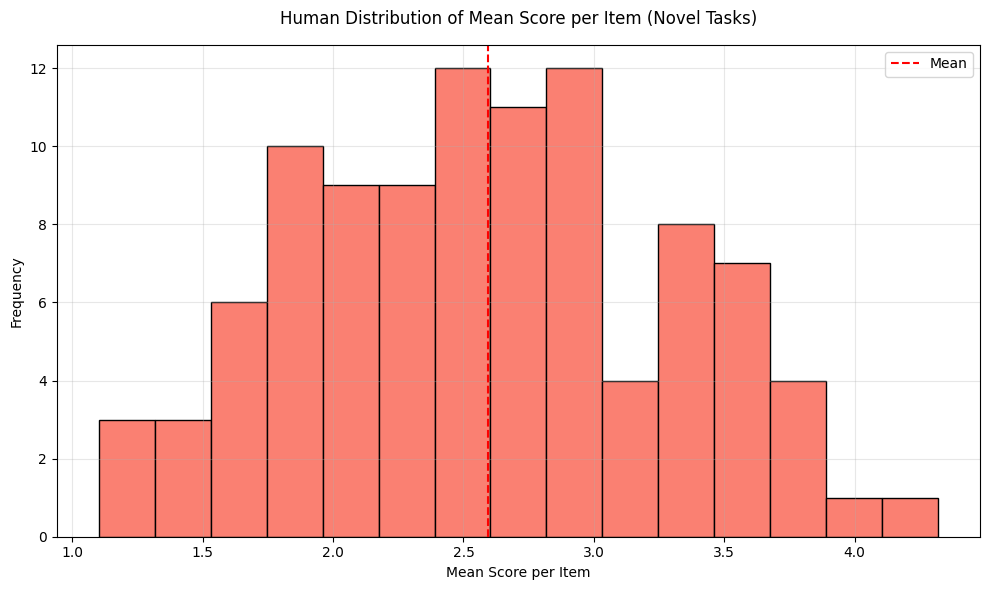

In [46]:
h_novel_mean = h_graded_results_novel["overall_score"].sum() / h_graded_results_novel["n_total"].sum()
print("Human novel task set mean score per item:", h_novel_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(h_graded_results_novel['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(h_novel_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Human Distribution of Mean Score per Item (Novel Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
h_graded_results

,ResponseId,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_5vQ6Xf1WugueDND,30.130952,29.261905,31.0,14,1,15,2.008730
1,R_6D6PBkrChss508l,30.083333,30.166667,30.0,13,2,15,2.005556
2,R_53qZezuj1Aowmel,28.071429,25.142857,31.0,15,0,15,1.871429
3,R_6hazd14Iv0vRJV7,25.190476,28.380952,22.0,15,0,15,1.679365
4,R_5KpdGyLKCFDJS5r,30.238095,28.476190,32.0,15,0,15,2.015873
...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,47.788095,44.576190,51.0,15,0,15,3.185873
96,R_1paSSMOwVWpJyn2,52.642857,46.285714,59.0,15,0,15,3.509524
97,R_7NhDTJ2fxewY5qh,37.183333,34.366667,40.0,15,0,15,2.478889
98,R_5RvyCf53JoQh7Eg,44.090476,43.180952,45.0,13,2,15,2.939365


Human overall mean score per item: 2.7012031915569974


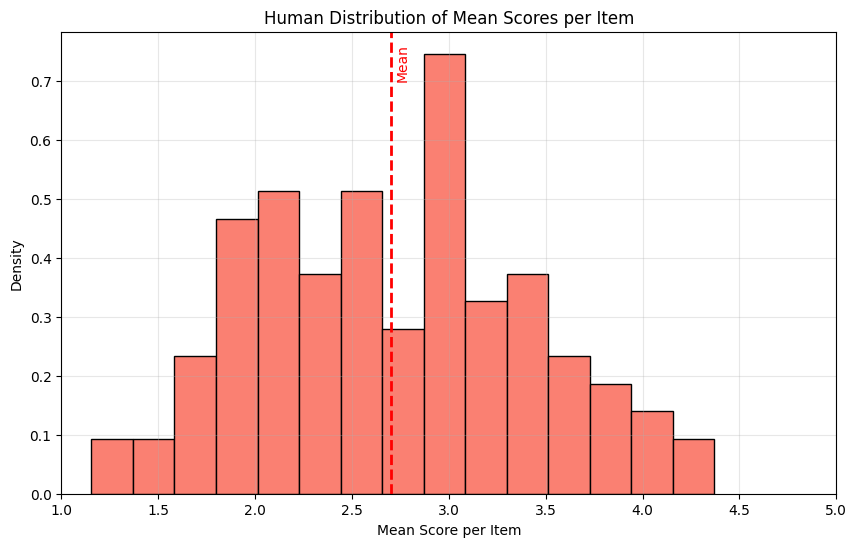

In [48]:
h_overall_mean = h_graded_results['overall_score'].sum() / h_graded_results['n_total'].sum()
print("Human overall mean score per item:", h_overall_mean)

plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['mean_score_per_item'], bins=15, color='salmon',
         edgecolor='black', density=True)
plt.axvline(h_overall_mean, color='red',
            linestyle='dashed', linewidth=2)
plt.text(h_overall_mean.mean() * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.title('Human Distribution of Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

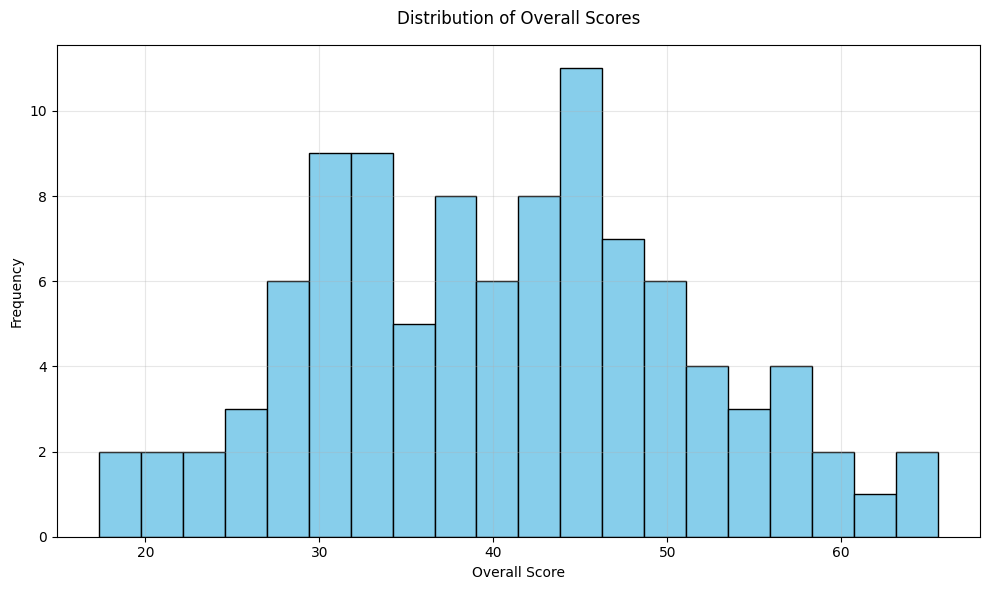

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Scores', pad=15, fontsize=12)
plt.xlabel('Overall Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

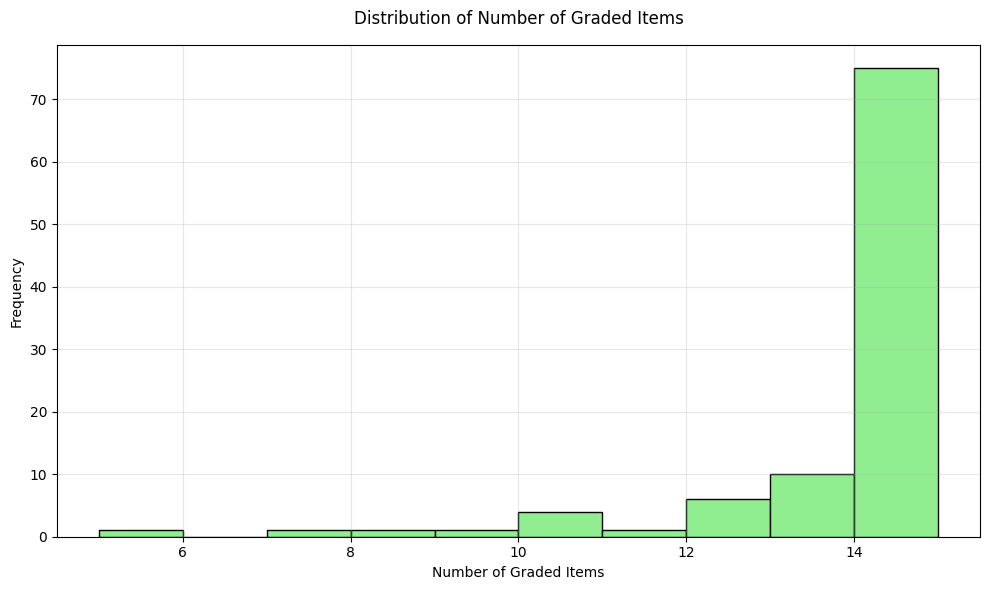

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['n_graded'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Graded Items', pad=15, fontsize=12)
plt.xlabel('Number of Graded Items', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
h_full_results

,ResponseId,label,raw,normal_mean,expert_mean,average_mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7,expert_1
0,R_5vQ6Xf1WugueDND,two chairs,two chairs,1.666667,1.0,1.333333,1.0,1.0,3.0,2.0,2.0,1.0,NaN,1.0
1,R_5vQ6Xf1WugueDND,swimming,swimming,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2,R_5vQ6Xf1WugueDND,cup,cup,1.166667,1.0,1.083333,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0
3,R_5vQ6Xf1WugueDND,letter j,letter j,1.833333,3.0,2.416667,4.0,1.0,1.0,2.0,1.0,2.0,NaN,3.0
4,R_5vQ6Xf1WugueDND,triangle,triangle,1.500000,1.0,1.250000,1.0,3.0,2.0,1.0,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,R_6YaCnTxmrtmyBmt,cup,cup,4.333333,5.0,4.666667,4.0,4.0,4.0,5.0,5.0,4.0,NaN,5.0
1385,R_6YaCnTxmrtmyBmt,gate,gate,1.666667,2.0,1.833333,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0
1386,R_6YaCnTxmrtmyBmt,present,present,2.833333,3.0,2.916667,1.0,5.0,2.0,3.0,3.0,3.0,NaN,3.0
1387,R_6YaCnTxmrtmyBmt,lottery ball,lottery ball,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [52]:
h_ungraded_results

,ResponseId,label,raw
0,R_5vQ6Xf1WugueDND,unsure,unsure
1,R_6D6PBkrChss508l,don't know,Don't know
2,R_6D6PBkrChss508l,looks like a triod with one more,Looks like a triod with one more
3,R_59txcXaWbmO04SW,i imagined two b’s facing outward attached by ...,I imagined two b’s facing outward attached by ...
4,R_59txcXaWbmO04SW,i picked your half a loop with two d’s back to...,I picked your half a loop with two D’s back to...
...,...,...,...
104,R_3hGCmhPK0roMNK6,bulb,bulb
105,R_1PcY1LS2Mfhz64A,hd,HD
106,R_7Kuxq2JKf3BOKPH,sideways t,sideways T
107,R_5RvyCf53JoQh7Eg,no idea,No idea


In [53]:
h_graded_results.to_csv("output_csvs/h_graded_results.csv")
h_full_results.to_csv("output_csvs/h_full_results.csv")
h_ungraded_results.to_csv("output_csvs/h_ungraded_results.csv")

h_graded_results_finke.to_csv("output_csvs/h_graded_results_finke.csv")
h_graded_results_novel.to_csv("output_csvs/h_graded_results_novel.csv")

In [54]:
llm_graded_results, llm_full_results, llm_ungraded_results = grade(llm_data, means_with_canon, "Model")
llm_graded_results_finke, _, _ = grade(llm_data, means_with_canon, "Model", FINKE_BLOCKS)
llm_graded_results_novel, _, _ = grade(llm_data, means_with_canon, "Model", NOVEL_BLOCKS)

In [55]:
llm_graded_results_finke

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),31.166667,28.333333,34.0,9,3,12,2.597222
1,OpenAI o3 Multiple Context (2025-07-21),41.683333,39.366667,44.0,12,0,12,3.473611
2,OpenAI ChatGPT-4o Single Context (2025-07-25),25.630952,24.261905,27.0,11,1,12,2.135913
3,GPT 4.1 Single Context (2025-07-21),35.230952,34.461905,36.0,11,1,12,2.935913
4,Gemini 2.0 Flash Multiple Context (2025-07-21),19.083333,19.166667,19.0,11,1,12,1.590278
5,OpenAI o4-mini Single Context (2025-07-21),22.750000,23.500000,22.0,11,1,12,1.895833
6,GPT 4.1 Single Context w/ Images (2025-07-21),22.250000,22.500000,22.0,11,1,12,1.854167
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),23.738095,22.476190,25.0,12,0,12,1.978175
8,OpenAI o3 Pro Multiple Context (2025-07-21),43.850000,42.700000,45.0,10,2,12,3.654167
9,GPT 4.1 Multiple Context (2025-07-21),21.023810,19.047619,23.0,12,0,12,1.751984


LLM Finke task set mean score per item: 2.4004054520358866


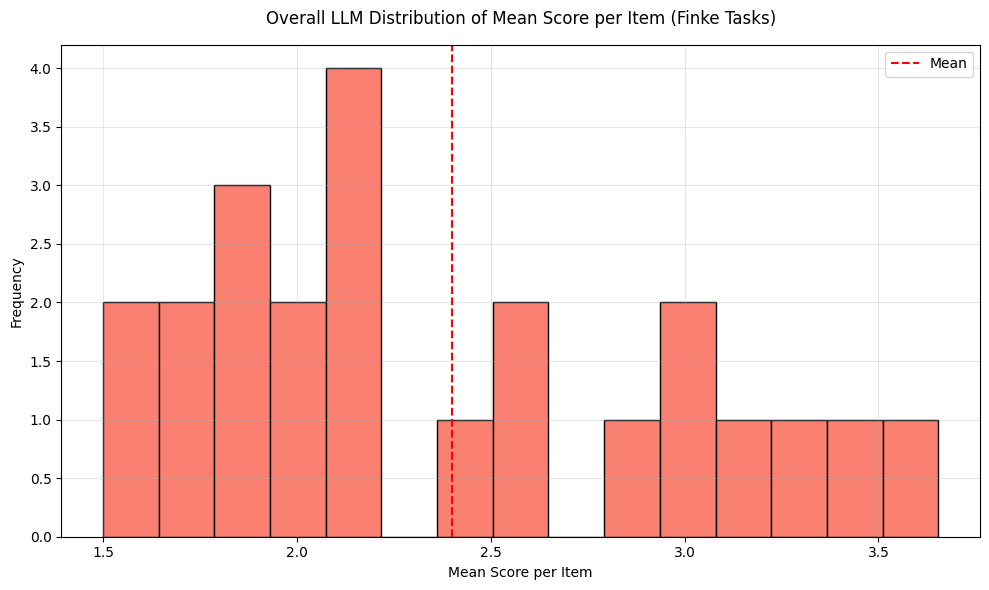

In [56]:
llm_finke_mean = llm_graded_results_finke["overall_score"].sum() / llm_graded_results_finke["n_total"].sum()
print("LLM Finke task set mean score per item:", llm_finke_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(llm_graded_results_finke['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(llm_finke_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Overall LLM Distribution of Mean Score per Item (Finke Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [57]:
llm_graded_results_novel

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),103.942857,97.885714,110.0,46,2,48,2.165476
1,OpenAI o3 Multiple Context (2025-07-21),131.992857,123.985714,140.0,45,3,48,2.749851
2,OpenAI ChatGPT-4o Single Context (2025-07-25),92.985714,84.971429,101.0,42,6,48,1.937202
3,GPT 4.1 Single Context (2025-07-21),95.833333,86.666667,105.0,45,3,48,1.996528
4,Gemini 2.0 Flash Multiple Context (2025-07-21),94.776190,88.552381,101.0,47,1,48,1.974504
5,OpenAI o4-mini Single Context (2025-07-21),117.221429,112.442857,122.0,44,4,48,2.442113
6,GPT 4.1 Single Context w/ Images (2025-07-21),93.354762,85.709524,101.0,45,3,48,1.944891
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),106.564286,96.128571,117.0,46,2,48,2.220089
8,OpenAI o3 Pro Multiple Context (2025-07-21),145.073810,131.147619,159.0,40,8,48,3.022371
9,GPT 4.1 Multiple Context (2025-07-21),100.095238,89.190476,111.0,47,1,48,2.085317


LLM novel task set mean score per item: 2.2873145272601794


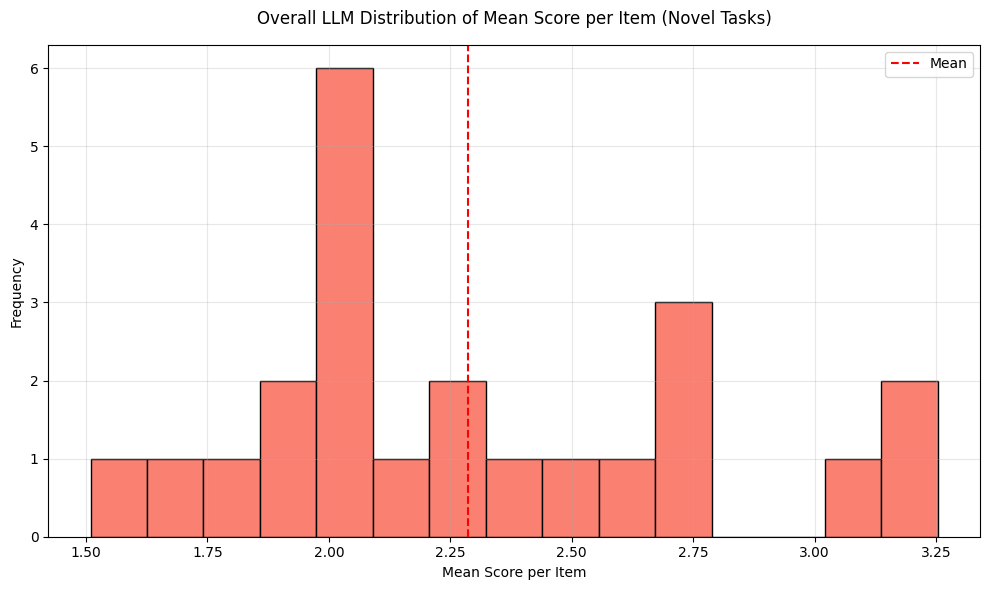

In [58]:
llm_novel_mean = llm_graded_results_novel["overall_score"].sum() / llm_graded_results_novel["n_total"].sum()
print("LLM novel task set mean score per item:", llm_novel_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(llm_graded_results_novel['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(llm_novel_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Overall LLM Distribution of Mean Score per Item (Novel Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
llm_graded_results

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),135.109524,126.219048,144.0,55,5,60,2.251825
1,OpenAI o3 Multiple Context (2025-07-21),173.676190,163.352381,184.0,57,3,60,2.894603
2,OpenAI ChatGPT-4o Single Context (2025-07-25),118.616667,109.233333,128.0,53,7,60,1.976944
3,GPT 4.1 Single Context (2025-07-21),131.064286,121.128571,141.0,56,4,60,2.184405
4,Gemini 2.0 Flash Multiple Context (2025-07-21),113.859524,107.719048,120.0,58,2,60,1.897659
5,OpenAI o4-mini Single Context (2025-07-21),139.971429,135.942857,144.0,55,5,60,2.332857
6,GPT 4.1 Single Context w/ Images (2025-07-21),115.604762,108.209524,123.0,56,4,60,1.926746
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),130.302381,118.604762,142.0,58,2,60,2.171706
8,OpenAI o3 Pro Multiple Context (2025-07-21),188.923810,173.847619,204.0,50,10,60,3.148730
9,GPT 4.1 Multiple Context (2025-07-21),121.119048,108.238095,134.0,59,1,60,2.018651


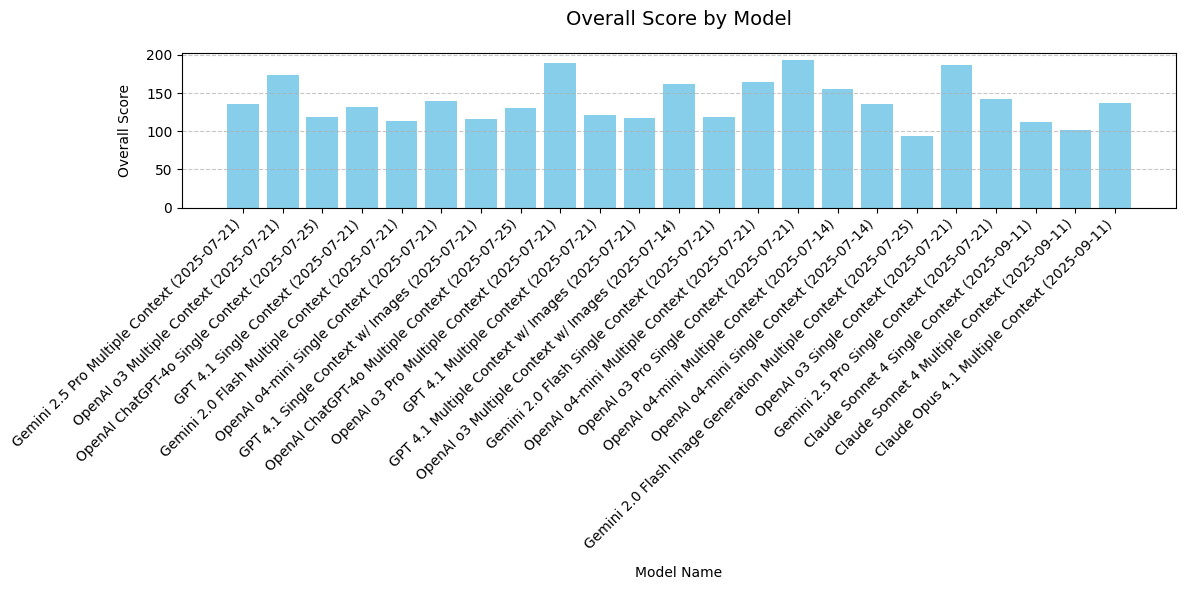

In [60]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(llm_graded_results['Model'])), llm_graded_results['overall_score'], color='skyblue')
plt.xticks(range(len(llm_graded_results['Model'])), llm_graded_results['Model'], rotation=45, ha='right')
plt.title('Overall Score by Model', pad=20, size=14)
plt.xlabel('Model Name', labelpad=10)
plt.ylabel('Overall Score', labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

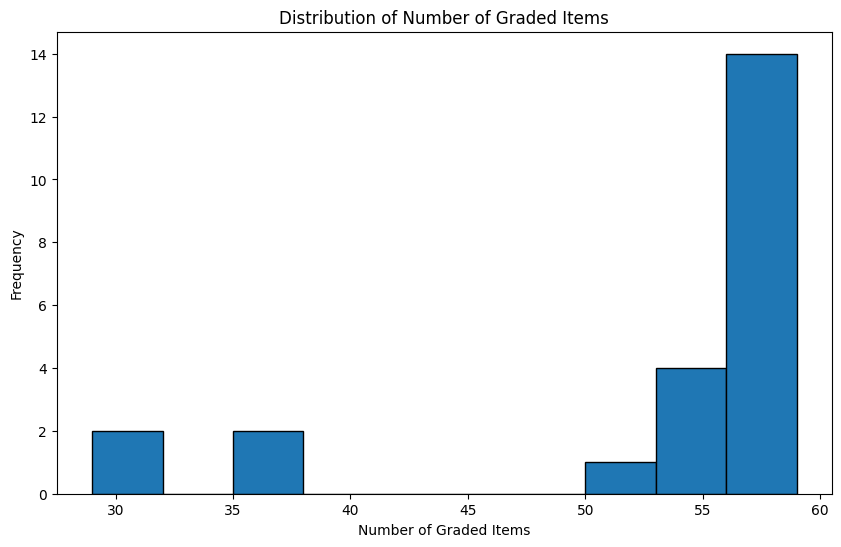

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(llm_graded_results['n_graded'], bins=10, edgecolor='black')
plt.title('Distribution of Number of Graded Items')
plt.xlabel('Number of Graded Items')
plt.ylabel('Frequency')
plt.show()

LLM overall mean score per item: 2.3099327122153213


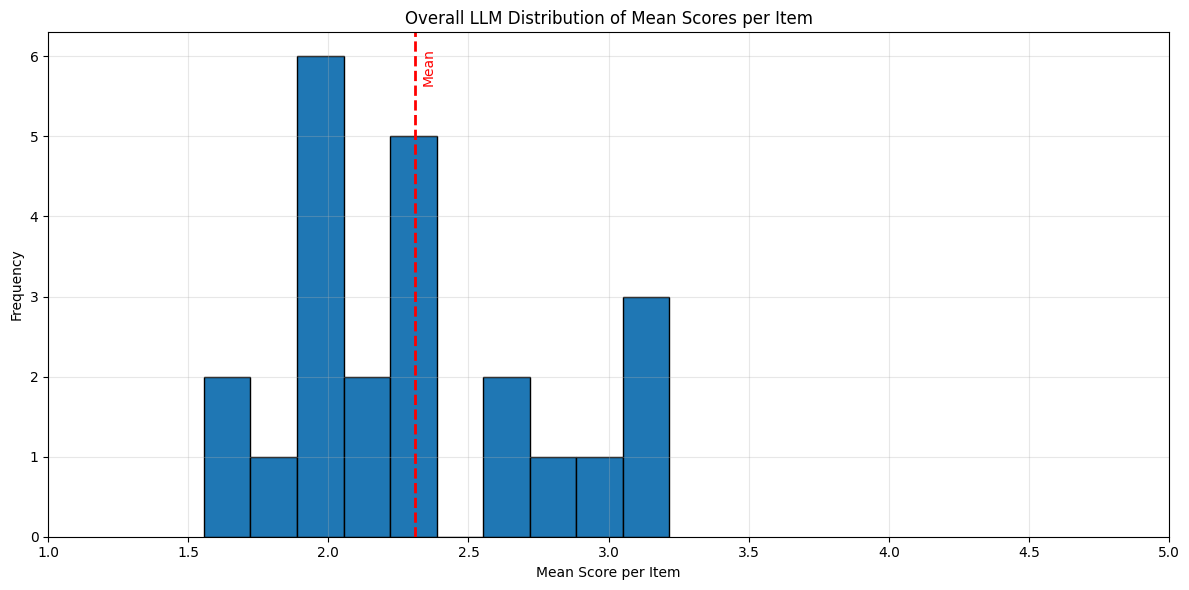

In [62]:
llm_overall_mean = llm_graded_results['overall_score'].sum() / llm_graded_results['n_total'].sum()
print("LLM overall mean score per item:", llm_overall_mean)

plt.figure(figsize=(12, 6))
plt.hist(llm_graded_results['mean_score_per_item'], bins=10, edgecolor='black')
plt.title('Overall LLM Distribution of Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(llm_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(llm_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

In [63]:
llm_full_results

,Model,label,raw,normal_mean,expert_mean,average_mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7,expert_1
0,Gemini 2.5 Pro Multiple Context (2025-07-21),ladder,ladder,5.000000,5.0,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0
1,Gemini 2.5 Pro Multiple Context (2025-07-21),ladder,Ladder,4.500000,5.0,4.750000,5.0,4.0,4.0,5.0,4.0,5.0,NaN,5.0
2,Gemini 2.5 Pro Multiple Context (2025-07-21),bed,bed,1.833333,3.0,2.416667,3.0,1.0,1.0,1.0,2.0,3.0,NaN,3.0
3,Gemini 2.5 Pro Multiple Context (2025-07-21),bed,bed,1.400000,3.0,2.200000,1.0,1.0,1.0,2.0,2.0,NaN,NaN,3.0
4,Gemini 2.5 Pro Multiple Context (2025-07-21),bed,bed,1.500000,3.0,2.250000,2.0,2.0,2.0,1.0,1.0,1.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Claude Opus 4.1 Multiple Context (2025-09-11),sailboat,Sailboat,4.833333,5.0,4.916667,5.0,5.0,5.0,4.0,5.0,5.0,NaN,5.0
1193,Claude Opus 4.1 Multiple Context (2025-09-11),music note,Music note,4.333333,5.0,4.666667,5.0,5.0,4.0,5.0,3.0,4.0,NaN,5.0
1194,Claude Opus 4.1 Multiple Context (2025-09-11),clock,Clock,4.666667,5.0,4.833333,4.0,5.0,5.0,4.0,5.0,5.0,NaN,5.0
1195,Claude Opus 4.1 Multiple Context (2025-09-11),hourglass,Hourglass,3.833333,5.0,4.416667,5.0,4.0,5.0,4.0,1.0,4.0,NaN,5.0


In [64]:
llm_ungraded_results

,Model,label,raw
0,Gemini 2.5 Pro Multiple Context (2025-07-21),winged scepter,Winged Scepter
1,Gemini 2.5 Pro Multiple Context (2025-07-21),cyrillic letter.,Cyrillic letter.
2,Gemini 2.5 Pro Multiple Context (2025-07-21),shelf bracket,Shelf bracket
3,Gemini 2.5 Pro Multiple Context (2025-07-21),planted sword,Planted sword
4,Gemini 2.5 Pro Multiple Context (2025-07-21),letter z.,Letter Z.
...,...,...,...
178,Claude Opus 4.1 Multiple Context (2025-09-11),spade symbol,Spade symbol
179,Claude Opus 4.1 Multiple Context (2025-09-11),cross,Cross
180,Claude Opus 4.1 Multiple Context (2025-09-11),stick figure,Stick figure
181,Claude Opus 4.1 Multiple Context (2025-09-11),downward arrow,Downward arrow


In [65]:
llm_graded_results.to_csv("output_csvs/llm_graded_results.csv")
llm_full_results.to_csv("output_csvs/llm_full_results.csv")
llm_ungraded_results.to_csv("output_csvs/llm_ungraded_results.csv")

llm_graded_results_finke.to_csv("output_csvs/llm_graded_results_finke.csv")
llm_graded_results_novel.to_csv("output_csvs/llm_graded_results_novel.csv")

In [66]:
o3_data = pd.read_csv("input_csvs/o3_phantasia_data.csv")
o3_data

,Model,59,58,57,56,55,54,53,52,51,...,38,39,40,41,42,43,44,45,46,47
0,OpenAI o3 Multiple Context (2025-07-21),Arrow,Umbrella,Hourglass,Registered trademark,Martini glass,smoking pipe,Sailboat,Letter F,Television,...,clubs symbol,clubs suit,Coffee mug,coffee mug,Tic-tac-toe,Power button,Lollipop,key,Hourglass,Asclepius rod
1,OpenAI o3 Pro Multiple Context (2025-07-21),tree,Umbrella,Scissor jack,lowercase r,Martini glass,key,Sailboat,Letter F,television,...,clubs symbol,clubs suit,Coffee mug,Coffee mug,Tic-tac-toe,Power symbol,Magnifying glass,Magnifying glass,eight,Treble clef
2,OpenAI o3 Multiple Context w/ Images (2025-07-14),House,Umbrella,Capital Z,letter k,arrow,music clef,Sailboat,Letter F,Wheelbarrow,...,Shamrock,owl,Coffee mug,Door,Grid,Power button,Dollar sign,Magnifying glass,eight,Dollar sign
3,OpenAI o3 Pro Single Context (2025-07-21),road sign,umbrella,hourglass,clock,martini glass,key,sailboat,signpost,birdhouse,...,clubs symbol,clubs suit,coffee mug,coffee mug,window,question mark,question mark,clock,pop-up toaster,teapot
4,OpenAI o3 Single Context (2025-07-21),tree,umbrella,bow tie,clock,martini glass,key,sailboat,forklift,house,...,clubs symbol,clubs suit,coffee mug,coffee mug,waffle,yo-yo,hot soup,wheelchair,window,anchor


In [67]:
everyone_else_llm_data = pd.concat([llm_data, o3_data]).drop_duplicates(keep=False)
everyone_else_llm_data

,Model,001,002,003,004,005,006,007,008,009,...,50,51,52,53,54,55,56,57,58,59
0,Gemini 2.5 Pro Multiple Context (2025-07-21),ladder,Ladder,bed,bed,bed,snail,arrow,Winged Scepter,Butterfly,...,Stick figure,Birdhouse,Shelf bracket,sailboat,key,Planted sword,Verified icon,Letter Z.,anchor,arrow
2,OpenAI ChatGPT-4o Single Context (2025-07-25),ladder,Ladder,butterfly,butterfly,butterfly,Insect head,hourglass,butterfly,Butterfly,...,tree,crest,flagpole,keyhole,music clef,Location marker,arrow,kite,Umbrella,arrow
3,GPT 4.1 Single Context (2025-07-21),ladder,Ladder,spade,heart,butterfly,glasses,tree,butterfly,Butterfly,...,candelabra,key,flagpole,sailboat,music note,Martini glass,Peace sign,Bow tie,Umbrella,arrowhead
4,Gemini 2.0 Flash Multiple Context (2025-07-21),Stacked H's,Ladder,bed,bed,woman,glasses,hourglass,butterfly,heart,...,Wine glass,keyhole,crosshair,Golf club,Paperclip,arrowhead,Partial logo.,hashtag,Hanging scale,arrowhead
5,OpenAI o4-mini Single Context (2025-07-21),Ladder,Ladder,Wine glass,Tongs,Tongs,Binoculars,tree,Butterfly,clover,...,Anchor,Birdhouse,Step stool,Pitching wedge,Bottle opener,Letter T,Power button,Truss bridge,Umbrella,Bird feeder
6,GPT 4.1 Single Context w/ Images (2025-07-21),ladder,fence,fence,Glasses,bed,glasses,Spire,butterfly,Butterfly,...,slingshot,keyhole,Letter F,Desk lamp,flag,pushpin,arm,Tape dispenser,Umbrella,bridge
7,OpenAI ChatGPT-4o Multiple Context (2025-07-25),ladder,Train tracks,butterfly,owl,glasses,Steering wheel,Rocket exhaust,butterfly,Butterfly,...,tree,figure,flagpole,Flag bracket,music clef,anchor,arrow,hourglass,Elephant trunk,campfire
9,GPT 4.1 Multiple Context (2025-07-21),ladder,Ladder,glasses,Glasses,glasses,glasses,Wine glass,butterfly,owl,...,Wine glass,keyhole,flagpole,Musical note,Gas pump,anchor,arm,Railroad crossing,Musical clef,Gymnastics apparatus
10,GPT 4.1 Multiple Context w/ Images (2025-07-21),ladder,Ladder,Eye glasses,butterfly,bed,barbell,Railroad track,butterfly,Butterfly,...,slingshot,keyhole,Lowercase r,Flag bracket,music clef,anchor,Broken letter,Zorro symbol,Pipe wrench,Gymnastics apparatus
12,Gemini 2.0 Flash Single Context (2025-07-21),ladder,fence,heart,Belly button,Belly button,Handcuffs,hourglass,hourglass,Cat ears,...,Martini glass,Robot arm,Picket fence,sailboat,Golf club,tree,balloon,windmill,Fishing hook,house


In [68]:
everyone_else_graded_results, _, _ = grade(everyone_else_llm_data, means_with_canon, "Model")
everyone_else_graded_results_finke, _, _ = grade(everyone_else_llm_data, means_with_canon, "Model", FINKE_BLOCKS)
everyone_else_graded_results_novel, _, _ = grade(everyone_else_llm_data, means_with_canon, "Model", NOVEL_BLOCKS)

In [69]:
everyone_else_graded_results_finke

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),31.166667,28.333333,34.0,9,3,12,2.597222
1,OpenAI ChatGPT-4o Single Context (2025-07-25),25.630952,24.261905,27.0,11,1,12,2.135913
2,GPT 4.1 Single Context (2025-07-21),35.230952,34.461905,36.0,11,1,12,2.935913
3,Gemini 2.0 Flash Multiple Context (2025-07-21),19.083333,19.166667,19.0,11,1,12,1.590278
4,OpenAI o4-mini Single Context (2025-07-21),22.750000,23.500000,22.0,11,1,12,1.895833
5,GPT 4.1 Single Context w/ Images (2025-07-21),22.250000,22.500000,22.0,11,1,12,1.854167
6,OpenAI ChatGPT-4o Multiple Context (2025-07-25),23.738095,22.476190,25.0,12,0,12,1.978175
7,GPT 4.1 Multiple Context (2025-07-21),21.023810,19.047619,23.0,12,0,12,1.751984
8,GPT 4.1 Multiple Context w/ Images (2025-07-21),18.000000,19.000000,17.0,11,1,12,1.500000
9,Gemini 2.0 Flash Single Context (2025-07-21),23.976190,22.952381,25.0,12,0,12,1.998016


Non-o3 LLM Finke task set mean score per item: 2.189539241622575


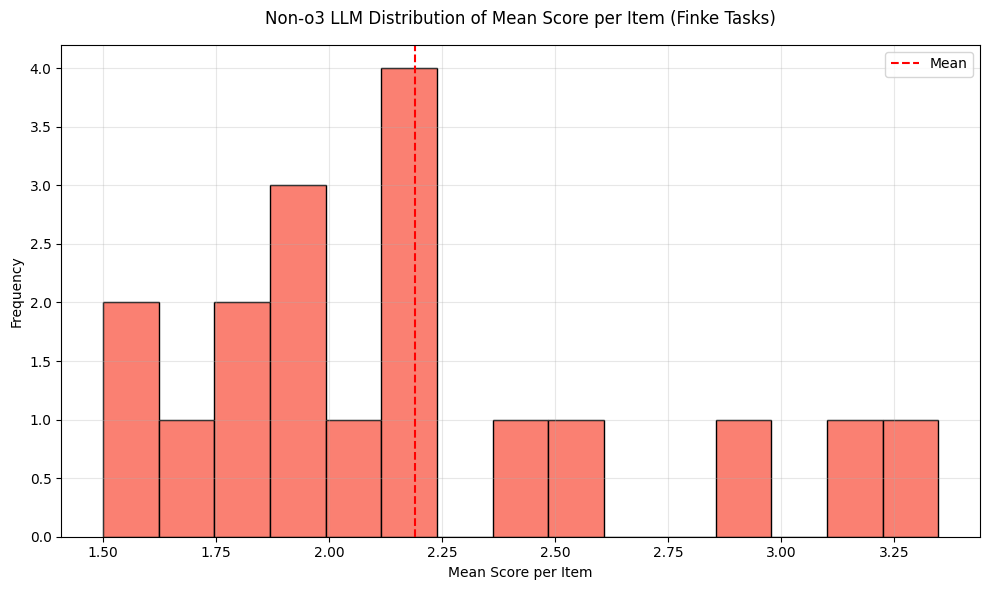

In [70]:
everyone_else_finke_mean = everyone_else_graded_results_finke["overall_score"].sum() / \
                           everyone_else_graded_results_finke["n_total"].sum()
print("Non-o3 LLM Finke task set mean score per item:", everyone_else_finke_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(everyone_else_graded_results_finke['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(everyone_else_finke_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Non-o3 LLM Distribution of Mean Score per Item (Finke Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [71]:
everyone_else_graded_results_novel

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),103.942857,97.885714,110.0,46,2,48,2.165476
1,OpenAI ChatGPT-4o Single Context (2025-07-25),92.985714,84.971429,101.0,42,6,48,1.937202
2,GPT 4.1 Single Context (2025-07-21),95.833333,86.666667,105.0,45,3,48,1.996528
3,Gemini 2.0 Flash Multiple Context (2025-07-21),94.776190,88.552381,101.0,47,1,48,1.974504
4,OpenAI o4-mini Single Context (2025-07-21),117.221429,112.442857,122.0,44,4,48,2.442113
5,GPT 4.1 Single Context w/ Images (2025-07-21),93.354762,85.709524,101.0,45,3,48,1.944891
6,OpenAI ChatGPT-4o Multiple Context (2025-07-25),106.564286,96.128571,117.0,46,2,48,2.220089
7,GPT 4.1 Multiple Context (2025-07-21),100.095238,89.190476,111.0,47,1,48,2.085317
8,GPT 4.1 Multiple Context w/ Images (2025-07-21),98.683333,92.366667,105.0,46,2,48,2.055903
9,Gemini 2.0 Flash Single Context (2025-07-21),94.869048,86.738095,103.0,46,2,48,1.976438


Non-o3 LLM Novel task set mean score per item: 2.0944361772486775


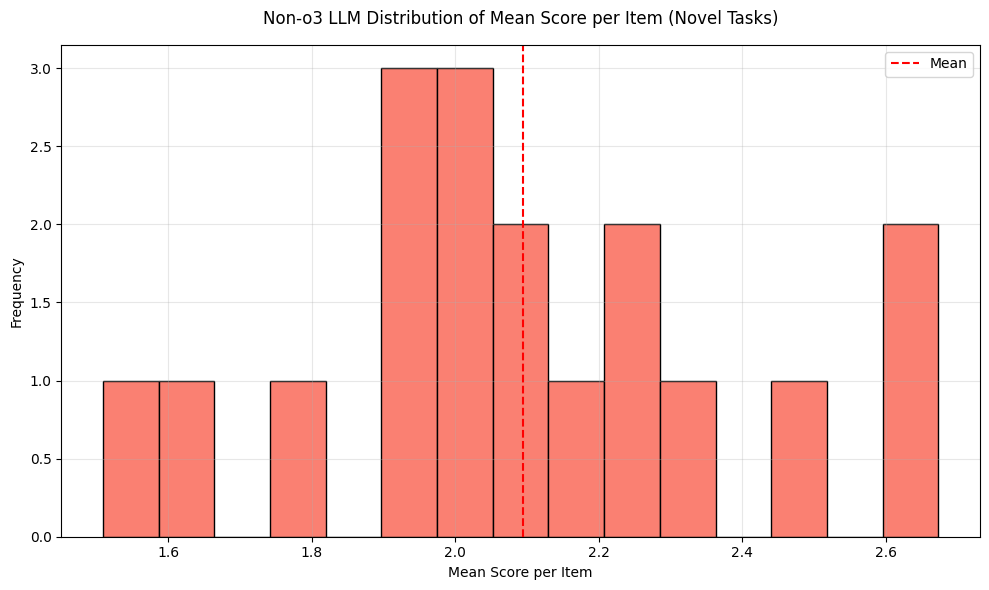

In [72]:
everyone_else_novel_mean = everyone_else_graded_results_novel["overall_score"].sum() / \
                           everyone_else_graded_results_novel["n_total"].sum()
print("Non-o3 LLM Novel task set mean score per item:", everyone_else_novel_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(everyone_else_graded_results_novel['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(everyone_else_novel_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Non-o3 LLM Distribution of Mean Score per Item (Novel Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [73]:
everyone_else_graded_results

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Gemini 2.5 Pro Multiple Context (2025-07-21),135.109524,126.219048,144.0,55,5,60,2.251825
1,OpenAI ChatGPT-4o Single Context (2025-07-25),118.616667,109.233333,128.0,53,7,60,1.976944
2,GPT 4.1 Single Context (2025-07-21),131.064286,121.128571,141.0,56,4,60,2.184405
3,Gemini 2.0 Flash Multiple Context (2025-07-21),113.859524,107.719048,120.0,58,2,60,1.897659
4,OpenAI o4-mini Single Context (2025-07-21),139.971429,135.942857,144.0,55,5,60,2.332857
5,GPT 4.1 Single Context w/ Images (2025-07-21),115.604762,108.209524,123.0,56,4,60,1.926746
6,OpenAI ChatGPT-4o Multiple Context (2025-07-25),130.302381,118.604762,142.0,58,2,60,2.171706
7,GPT 4.1 Multiple Context (2025-07-21),121.119048,108.238095,134.0,59,1,60,2.018651
8,GPT 4.1 Multiple Context w/ Images (2025-07-21),116.683333,111.366667,122.0,57,3,60,1.944722
9,Gemini 2.0 Flash Single Context (2025-07-21),118.845238,109.690476,128.0,58,2,60,1.980754


Non-o3 LLMs overall mean score per item: 2.1134567901234567


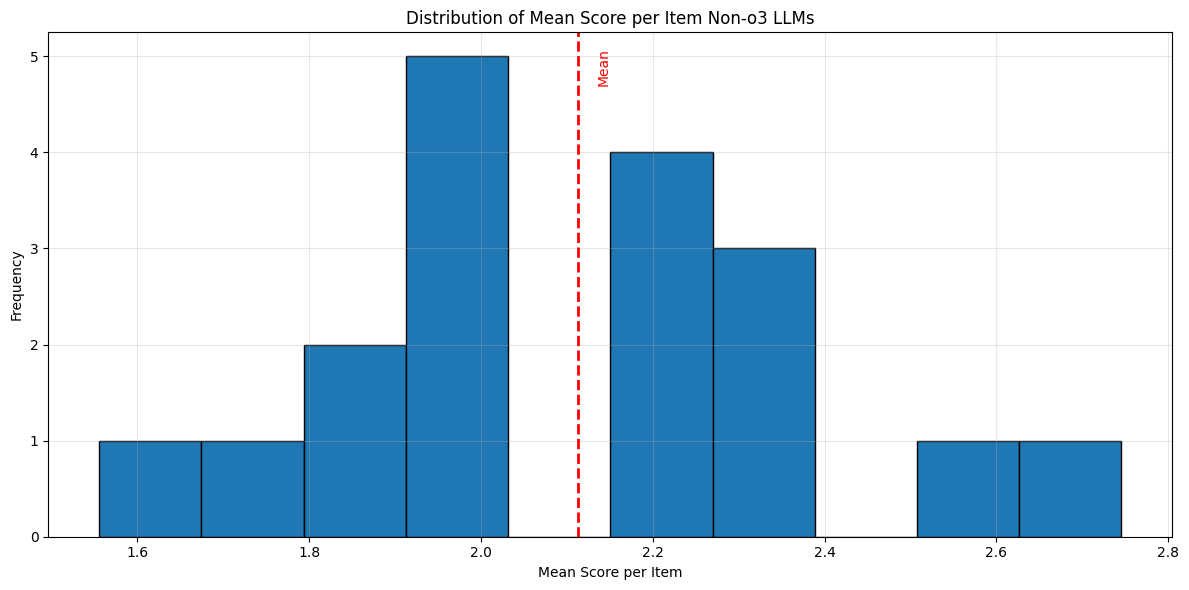

In [74]:
everyone_else_overall_mean = everyone_else_graded_results['overall_score'].sum() / everyone_else_graded_results[
    'n_total'].sum()
print("Non-o3 LLMs overall mean score per item:", everyone_else_overall_mean)

plt.figure(figsize=(12, 6))
plt.hist(everyone_else_graded_results['mean_score_per_item'], bins=10, edgecolor='black')
plt.title('Distribution of Mean Score per Item Non-o3 LLMs')
plt.xlabel('Mean Score per Item')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(everyone_else_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(everyone_else_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

In [75]:
o3_graded_results, _, _ = grade(o3_data, means_with_canon, "Model")
o3_graded_results_finke, _, _ = grade(o3_data, means_with_canon, "Model", FINKE_BLOCKS)
o3_graded_results_novel, _, _ = grade(o3_data, means_with_canon, "Model", NOVEL_BLOCKS)

In [76]:
o3_graded_results_finke

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,OpenAI o3 Multiple Context (2025-07-21),41.683333,39.366667,44.0,12,0,12,3.473611
1,OpenAI o3 Pro Multiple Context (2025-07-21),43.850000,42.700000,45.0,10,2,12,3.654167
2,OpenAI o3 Multiple Context w/ Images (2025-07-14),31.321429,31.642857,31.0,10,2,12,2.610119
3,OpenAI o3 Pro Single Context (2025-07-21),36.850000,34.700000,39.0,11,1,12,3.070833
4,OpenAI o3 Single Context (2025-07-21),35.866667,36.733333,35.0,12,0,12,2.988889


o3 LLM Family Finke task set mean score per item: 3.15952380952381
o3 LLM Family (no images) Finke task set mean score per item: 3.296875


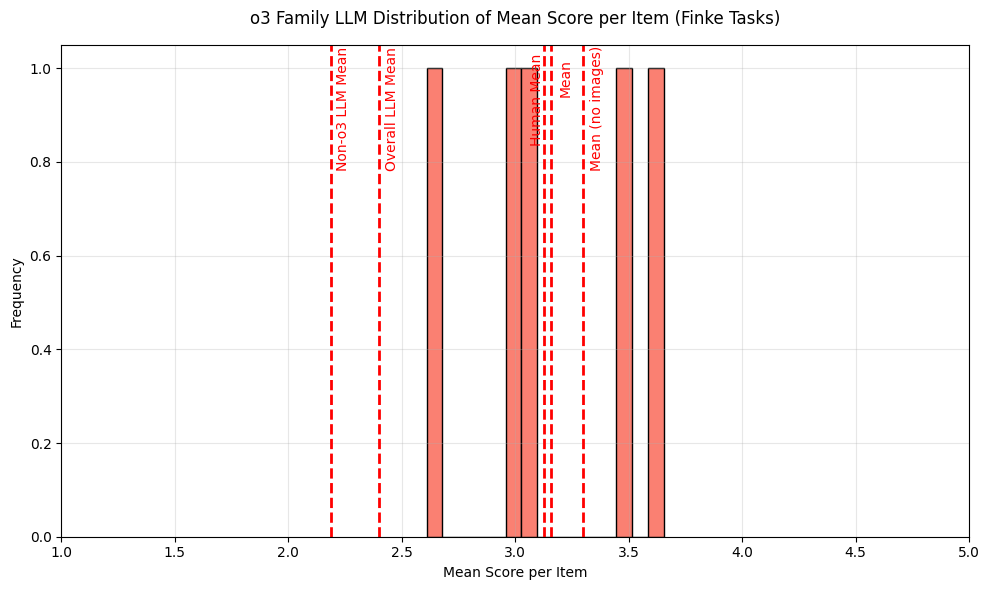

In [77]:
o3_finke_mean = o3_graded_results_finke["overall_score"].sum() / o3_graded_results_finke["n_total"].sum()
o3_finke_no_images = o3_graded_results_finke.drop(2)
o3_finke_mean_no_images = o3_finke_no_images['overall_score'].sum() / o3_finke_no_images['n_total'].sum()
print("o3 LLM Family Finke task set mean score per item:", o3_finke_mean)
print("o3 LLM Family (no images) Finke task set mean score per item:", o3_finke_mean_no_images)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(o3_graded_results_finke['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.set_title('o3 Family LLM Distribution of Mean Score per Item (Finke Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.grid(True, alpha=0.3)
ax.axvline(o3_finke_mean,
           color='red', linestyle='dashed', linewidth=2)
ax.text(o3_finke_mean * 1.01,
        plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
ax.axvline(o3_finke_mean_no_images,
           color='red', linestyle='dashed', linewidth=2)
ax.text(o3_finke_mean_no_images * 1.01,
        plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
ax.axvline(h_finke_mean,
           color='red', linestyle='dashed', linewidth=2)
ax.text(h_finke_mean * .98,
        plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
ax.axvline(llm_finke_mean,
           color='red', linestyle='dashed', linewidth=2)
ax.text(llm_finke_mean * 1.01,
        plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
ax.axvline(everyone_else_finke_mean,
           color='red', linestyle='dashed', linewidth=2)
plt.text(everyone_else_finke_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
plt.xlim((1, 5))
plt.tight_layout()
plt.show()

In [78]:
o3_graded_results_novel

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,OpenAI o3 Multiple Context (2025-07-21),131.992857,123.985714,140.0,45,3,48,2.749851
1,OpenAI o3 Pro Multiple Context (2025-07-21),145.073810,131.147619,159.0,40,8,48,3.022371
2,OpenAI o3 Multiple Context w/ Images (2025-07-14),130.921429,113.842857,148.0,43,5,48,2.727530
3,OpenAI o3 Pro Single Context (2025-07-21),156.164286,142.328571,170.0,46,2,48,3.253423
4,OpenAI o3 Single Context (2025-07-21),151.450000,133.900000,169.0,45,3,48,3.155208


o3 LLM Family Novel task set mean score per item: 2.9816765873015876
o3 LLM Family (no images) Novel task set mean score per item: 3.0452132936507943


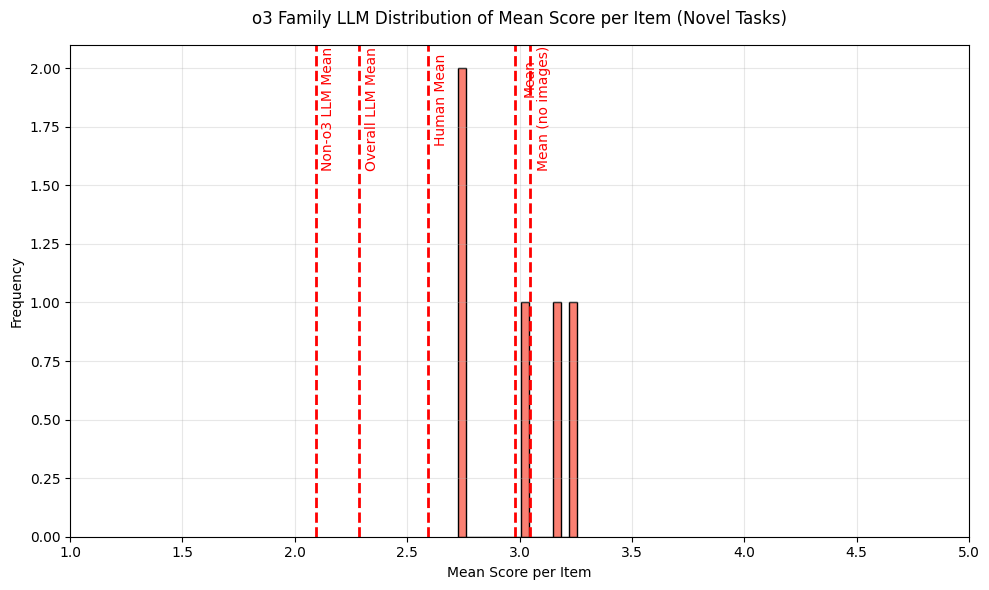

In [79]:
o3_novel_mean = o3_graded_results_novel["overall_score"].sum() / o3_graded_results_novel["n_total"].sum()
o3_novel_no_images = o3_graded_results_novel.drop(2)
o3_novel_mean_no_images = o3_novel_no_images['overall_score'].sum() / o3_novel_no_images['n_total'].sum()
print("o3 LLM Family Novel task set mean score per item:", o3_novel_mean)
print("o3 LLM Family (no images) Novel task set mean score per item:", o3_novel_mean_no_images)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(o3_graded_results_novel['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.set_title('o3 Family LLM Distribution of Mean Score per Item (Novel Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.grid(True, alpha=0.3)
ax.axvline(o3_novel_mean,
           color='red', linestyle='dashed', linewidth=2)
ax.text(o3_novel_mean * 1.01,
        plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
ax.axvline(o3_novel_mean_no_images,
           color='red', linestyle='dashed', linewidth=2)
ax.text(o3_novel_mean_no_images * 1.01,
        plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
ax.axvline(h_novel_mean,
           color='red', linestyle='dashed', linewidth=2)
ax.text(h_novel_mean * 1.01,
        plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
ax.axvline(llm_novel_mean,
           color='red', linestyle='dashed', linewidth=2)
ax.text(llm_novel_mean * 1.01,
        plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
ax.axvline(everyone_else_novel_mean,
           color='red', linestyle='dashed', linewidth=2)
plt.xlim((1, 5))
plt.text(everyone_else_novel_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

In [80]:
o3_graded_results

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,OpenAI o3 Multiple Context (2025-07-21),173.676190,163.352381,184.0,57,3,60,2.894603
1,OpenAI o3 Pro Multiple Context (2025-07-21),188.923810,173.847619,204.0,50,10,60,3.148730
2,OpenAI o3 Multiple Context w/ Images (2025-07-14),162.242857,145.485714,179.0,53,7,60,2.704048
3,OpenAI o3 Pro Single Context (2025-07-21),193.014286,177.028571,209.0,57,3,60,3.216905
4,OpenAI o3 Single Context (2025-07-21),187.316667,170.633333,204.0,57,3,60,3.121944


o3 overall mean score per item: 3.017246031746032
o3 overall mean score per item (no images): 3.0955456349206347


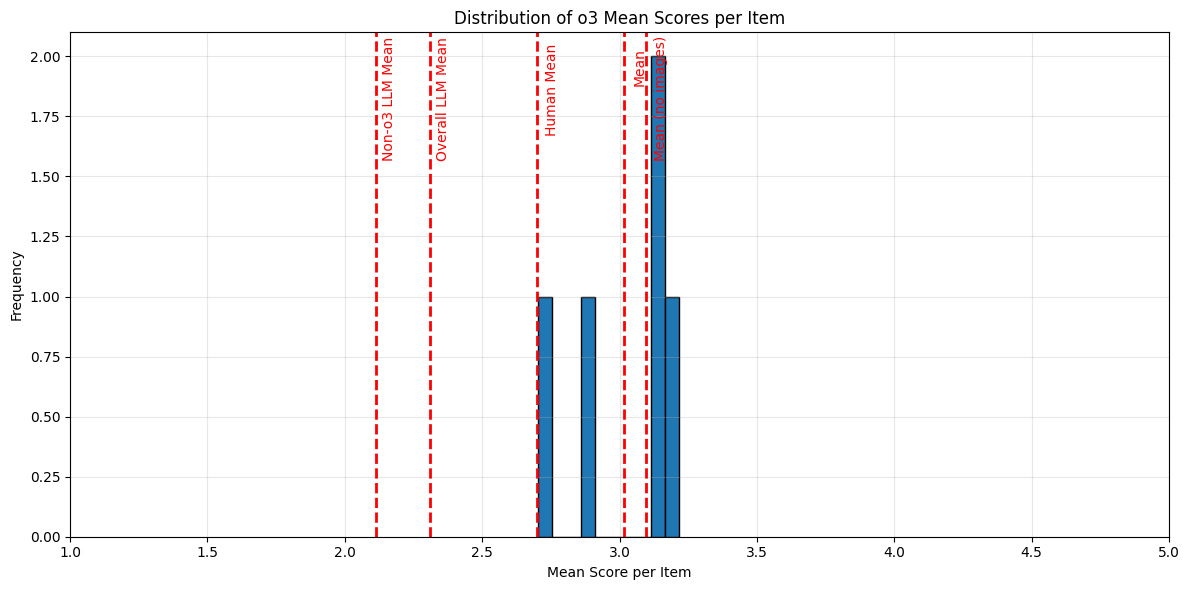

In [81]:
o3_overall_mean = o3_graded_results['overall_score'].sum() / o3_graded_results['n_total'].sum()
o3_no_images = o3_graded_results.drop(2)
o3_mean_no_images = o3_no_images['overall_score'].sum() / o3_no_images['n_total'].sum()
print("o3 overall mean score per item:", o3_overall_mean)
print("o3 overall mean score per item (no images):", o3_mean_no_images)

plt.figure(figsize=(12, 6))
plt.hist(o3_graded_results['mean_score_per_item'], edgecolor='black')
plt.title('Distribution of o3 Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(o3_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(o3_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.axvline(o3_mean_no_images,
            color='red', linestyle='dashed', linewidth=2)
plt.text(o3_mean_no_images * 1.01,
         plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
plt.axvline(h_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(h_overall_mean * 1.01,
         plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
plt.axvline(llm_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(llm_overall_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
plt.axvline(everyone_else_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(everyone_else_overall_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

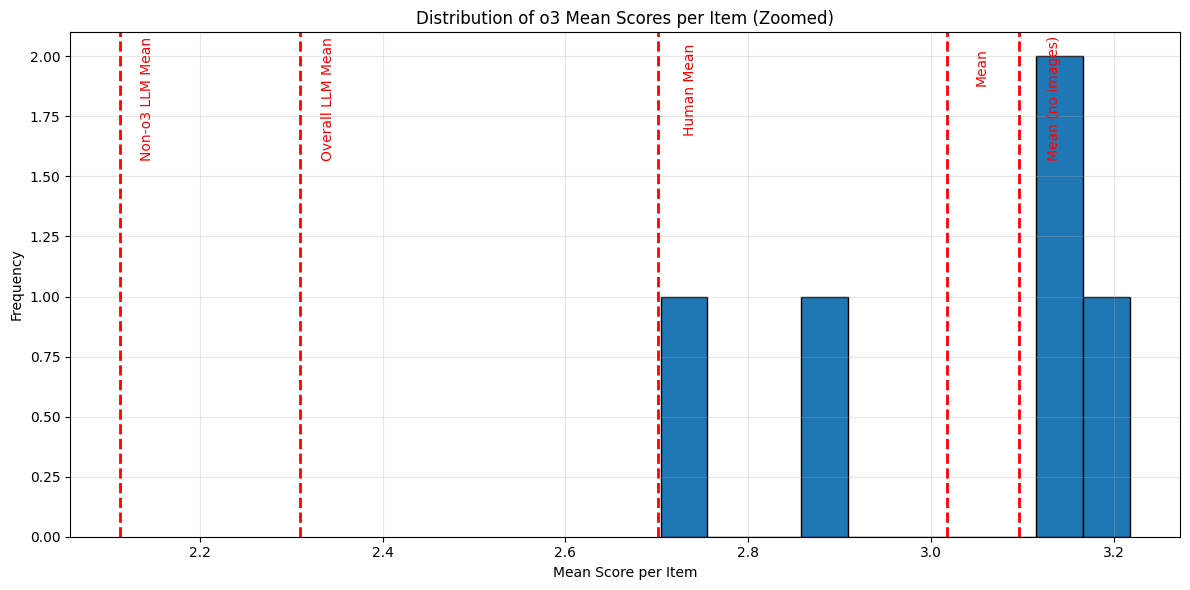

In [82]:
plt.figure(figsize=(12, 6))
plt.hist(o3_graded_results['mean_score_per_item'], edgecolor='black')
plt.title('Distribution of o3 Mean Scores per Item (Zoomed)')
plt.xlabel('Mean Score per Item')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(o3_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(o3_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.axvline(o3_mean_no_images,
            color='red', linestyle='dashed', linewidth=2)
plt.text(o3_mean_no_images * 1.01,
         plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
plt.axvline(h_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(h_overall_mean * 1.01,
         plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
plt.axvline(llm_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(llm_overall_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
plt.axvline(everyone_else_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(everyone_else_overall_mean * 1.01,
         plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

### 4) Estimate Difficulty of Each Instruction Set

In [83]:
instructions_meta_data = pd.read_csv("input_csvs/meta_instruction_data.csv")
instructions_meta_data

,Ins 1,Ins 2,Ins 3,Ins 4,Canon,Num Ins,Num Obj
0,"<X> a capital letter ""H"".","<X> an identical capital letter ""H"" directly b...","<X> a third identical ""H"" just below the exist...",NaN,Ladder,3,3
1,"<X> a capital letter ""I"" consisting of three l...","<X> an identical capital letter ""I"" directly t...","<X> a third identical ""I"" just to the right of...",<X> the entire scene rotated 90 degrees to the...,Ladder,4,3
2,"<X> two lowercase letter ""p"" next to each other.",<X> the right figure mirrored so that it point...,<X> the figure on the left moved to the right ...,<X> the entire scene upside down.,Glasses,4,2
3,"<X> two lowercase letter ""b"" next to each other.",<X> the right figure mirrored so that it point...,<X> the figure on the left moved to the right ...,NaN,Glasses,3,2
4,"<X> a lowercase letter ""b"" to the left of a lo...",<X> the figure on the left moved to the right ...,NaN,NaN,Glasses,2,2
5,"<X> the number ""8"" with two equally sized loops.",<X> the figure rotated 90 degrees to the right.,"<X> two short lines coming up, vertically, fro...",NaN,Glasses,3,3
6,"<X> two capital letter ""V"", one above the othe...",<X> the entire scene upside down.,<X> a line running from the top of the top fig...,NaN,Pine Tree,3,3
7,"<X> two capital letter ""B"" next to each other.",<X> the left figure mirrored so that it points...,"<X> a capital letter ""Y"" in-between the two fi...",<X> all three figures aligned such that the th...,Butterfly,4,3
8,"<X> two capital letter ""B"" next to each other.",<X> the left figure mirrored so that it points...,<X> the two figures aligned such that the two ...,"<X> a lowercase letter ""v"" affixed to the midd...",Butterfly,4,3
9,"<X> a capital letter ""E"" with all straight lines.",<X> the figure rotated 90 degrees to the left.,"<X> a capital letter ""I"", consisting of three ...",<X> the bottom horizontal line of the figure r...,"Comb, Pitchfork",4,2


In [84]:
def numeric_identifier_to_string(n: int):
    if n >= 100:
        return f"{n}"
    elif n < 10:
        return f"00{n}"
    else:
        return f"0{n}"

In [85]:
human_difficulty_data = pd.read_csv("input_csvs/human_phantasia_difficulty_ranking_data.csv")
human_difficulty_data

,ResponseId,001 - Rating_1,001 - Rating_2,002 - Rating_1,002 - Rating_2,003 - Rating_1,003 - Rating_2,004 - Rating_1,004 - Rating_2,005 - Rating_1,...,056 - Rating_1,056 - Rating_2,057 - Rating_1,057 - Rating_2,058 - Rating_1,058 - Rating_2,059 - Rating_1,059 - Rating_2,060 - Rating_1,060 - Rating_2
0,R_3Wu3EGpCFW6Qbuk,NaN,NaN,NaN,NaN,Somewhat agree,Somewhat disagree,NaN,NaN,NaN,...,NaN,NaN,Strongly agree,Strongly disagree,NaN,NaN,Strongly agree,Strongly disagree,NaN,NaN
1,R_7Kuxq2JKf3BOKPH,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R_1NxJpYzFJggITGm,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN,Strongly agree,...,Strongly agree,Somewhat agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R_1riWAwAgFR9OYj9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Somewhat agree,Somewhat agree,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN
4,R_7LLF8qLJV3UgQE1,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Strongly disagree,NaN,...,NaN,NaN,NaN,NaN,Strongly agree,Somewhat agree,NaN,NaN,Strongly agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_3qK9HL1UIzK92MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Strongly agree,NaN,NaN
96,R_6NWzqbX4O0AMjJv,NaN,NaN,NaN,NaN,Somewhat agree,Strongly agree,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN
97,R_5dWeWShB7qgdljb,NaN,NaN,Neither agree nor disagree,Neither agree nor disagree,NaN,NaN,Somewhat agree,Somewhat agree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,R_3zpB5H3IbG7VP2T,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Somewhat agree,NaN,...,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,Somewhat agree,Neither agree nor disagree,NaN,NaN


In [86]:
agreement_scale_map = {
    "Strongly agree": 5,
    "Somewhat agree": 4,
    "Neither agree nor disagree": 3,
    "Somewhat disagree": 2,
    "Strongly disagree": 1
}

In [87]:
def clarity_and_identifiability_list(n: int, diff_data: pd.DataFrame):
    clarity = []
    identifiability = []
    numeric_id = numeric_identifier_to_string(n)
    rating_columns = [col for col in diff_data.columns if numeric_id in str(col)]
    for col in rating_columns:
        if "Rating_1" in col:
            clarity += [agreement_scale_map[x] for x in diff_data[col] if not pd.isna(x)]
        if "Rating_2" in col:
            identifiability += [agreement_scale_map[y] for y in diff_data[col] if not pd.isna(y)]
    return clarity, identifiability

In [88]:
def calc_unique_resp_ratio(n: int, human_phantasia_data: pd.DataFrame):
    n_id = numeric_identifier_to_string(n)
    response_col = [col for col in human_phantasia_data.columns if n_id in str(col)][0]
    response_list = human_phantasia_data[response_col]
    length = len([x for x in response_list if not pd.isna(x)])
    unique_resp_c = len(set([x for x in response_list if not pd.isna(x)]))
    return unique_resp_c, length

In [89]:
def add_difficulty_info(ins_metadata: pd.DataFrame, diff_data: pd.DataFrame, human_phantasia_data: pd.DataFrame):
    clarity_mean_col, identifiability_mean_col = [], []
    clarity_std_col, identifiability_std_col = [], []
    clarity_median_col, identifiability_median_col = [], []
    uniq_resp_col, num_resp_col, uniq_resp_ratio_col = [], [], []
    for n, row in enumerate(ins_metadata.itertuples()):
        n_id = n + 1
        clarity, identifiability = clarity_and_identifiability_list(n_id, diff_data)
        np_clarity = np.array(clarity)
        np_identifiability = np.array(identifiability)

        clarity_mean_col.append(np_clarity.mean())
        clarity_std_col.append(np_clarity.std())
        clarity_median_col.append(np.median(np_clarity))

        identifiability_mean_col.append(np_identifiability.mean())
        identifiability_std_col.append(np_identifiability.std())
        identifiability_median_col.append(np.median(np_identifiability))

        n_uniq, n_resp = calc_unique_resp_ratio(n_id, human_phantasia_data)
        uniq_resp_col.append(n_uniq)
        num_resp_col.append(n_resp)
        uniq_resp_ratio_col.append(n_uniq / n_resp)
    meta_df = pd.DataFrame({"Canon": ins_metadata["Canon"],
                            "Num Ins": ins_metadata["Num Ins"], "Num Obj": ins_metadata["Num Obj"],
                            "Clarity Mean": clarity_mean_col, "Clarity Std": clarity_std_col,
                            "Clarity Median": clarity_median_col,
                            "Identifiability Mean": identifiability_mean_col,
                            "Identifiability Std": identifiability_std_col,
                            "Identifiability Median": identifiability_median_col,
                            "Unique Responses": uniq_resp_col, "Total Responses": num_resp_col,
                            "Unique Response Ratio": uniq_resp_ratio_col})
    return meta_df

In [90]:
difficulty_breakdown_df = add_difficulty_info(instructions_meta_data, human_difficulty_data, human_data)
difficulty_breakdown_df

,Canon,Num Ins,Num Obj,Clarity Mean,Clarity Std,Clarity Median,Identifiability Mean,Identifiability Std,Identifiability Median,Unique Responses,Total Responses,Unique Response Ratio
0,Ladder,3,3,4.730769,0.811347,5.0,4.769231,0.575640,5.0,8,26,0.307692
1,Ladder,4,3,4.040000,1.182540,4.0,3.920000,1.494523,5.0,14,25,0.560000
2,Glasses,4,2,3.500000,1.339946,4.0,3.045455,1.260493,3.0,19,22,0.863636
3,Glasses,3,2,4.400000,0.848528,5.0,3.640000,1.352923,4.0,16,25,0.640000
4,Glasses,2,2,3.884615,1.280833,4.0,3.307692,1.352184,4.0,18,26,0.692308
5,Glasses,3,3,3.960000,1.148216,4.0,3.480000,1.268700,4.0,16,25,0.640000
6,Pine Tree,3,3,4.304348,0.997160,5.0,4.217391,0.882512,4.0,10,23,0.434783
7,Butterfly,4,3,4.222222,1.314684,5.0,3.962963,1.477773,5.0,10,27,0.370370
8,Butterfly,4,3,4.120000,1.243222,5.0,3.960000,1.455472,5.0,10,25,0.400000
9,"Comb, Pitchfork",4,2,3.769231,1.186711,4.0,3.153846,1.511299,4.0,23,26,0.884615


In [91]:
difficulty_breakdown_df.to_csv("output_csvs/difficulty_per_item.csv")